# Example Extinction Calculations

Show example of using `extinction` package to
1. Calculate extinction as a function of $\lambda$ for a given $R_V$, $E(B-V)$, and extinction law
2. Calculate color excess relationship for a given extinction law.  Specifically,  
  1. How to convert $E(g-r)$ to $E(B-V)$
  2. How to convert $E(g-r)$ to $A_V$

In [1]:
import extinction

import matplotlib.pyplot as plt
import numpy as np

import astropy.units as u
import astropy.constants as const

In [2]:
%matplotlib inline

Let's create a spectrum over some set of optical wavelengths

In [3]:
wavelength = np.linspace(3000, 10000, 701) * u.angstrom
frequency = const.c / wavelength
frequency = frequency.to(u.Hz)
# Constant AB erg/s/cm^2/Hz
norm = 1000 * u.erg / u.s / u.cm ** 2
flux_density_frequency = norm / frequency
flux_density_wavelength = flux_density_frequency * const.c / wavelength ** 2
flux_density_wavelength = flux_density_wavelength.to(
    u.erg / u.s / u.cm ** 2 / u.angstrom
)

Plot the spectral flux densities vs. wavelength and vs. frequency

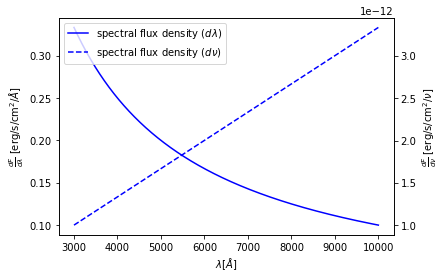

In [4]:
ax1 = plt.gca()
ax1.plot(
    wavelength,
    flux_density_wavelength,
    color="blue",
    ls="-",
    label="spectral flux density ($d\lambda$)",
)
ax1.set_xlabel(r"$\lambda [\AA]$")
ax1.set_ylabel(r"$\frac{dF}{d\lambda}$ [erg/s/cm$^2$/$\AA$]")
ax2 = ax1.twinx()
ax2.plot(
    wavelength,
    flux_density_frequency,
    color="blue",
    ls="--",
    label=r"spectral flux density ($d\nu$)",
)
ax2.set_xlabel(r"$\nu$ [Hz]$")
ax2.set_ylabel(r"$\frac{dF}{d\nu}$ [erg/s/cm$^2$/$\nu$]")

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2);

------

## 1. Calculating Extinction

We can use the `extinction` package to calculate a sample wavelength-dependent extinction.

```
pip install extinction
```

We need to choose a dust extinction law.  This is what translates a given color excess to the extinction per wavelength.  The dust law takes $A_V$ as input, with $R_V$ as optional.

We here choose a Fitzpatrick99 dust extinction law.

In [5]:
help(extinction.fitzpatrick99)

Help on built-in function fitzpatrick99 in module extinction:

fitzpatrick99(...)
    fitzpatrick99(wave, a_v, r_v=3.1, unit='aa')
    
    Fitzpatrick (1999) dust extinction function.
    
    Fitzpatrick (1999) [1]_ model which relies on the parametrization
    of Fitzpatrick & Massa (1990) [2]_ in the UV (below 2700 A) and
    spline fitting in the optical and IR. This function is defined
    from 910 A to 6 microns, but note the claimed validity goes down
    only to 1150 A. The optical spline points are not taken from F99
    Table 4, but rather updated versions from E. Fitzpatrick (this
    matches the Goddard IDL astrolib routine FM_UNRED).
    
    
    Parameters
    ----------
    wave : numpy.ndarray (1-d)
        Input wavelengths or wavenumbers (see units).
    a_v : float
        Total V-band extinction in magnitudes.
    r_v : float
        Ratio of total to selective extinction, A_V / E(B-V).
    unit : {'aa', 'invum'}, optional
        Wavelength units: Angstroms or in

In [6]:
rv = 3.1
e_bv = 0.2
av = rv * e_bv

mag_ext = extinction.fitzpatrick99(wavelength.to(u.angstrom), av, rv)
extincted_flux_density_wavelength = flux_density_wavelength * 10 ** (-0.4 * mag_ext)

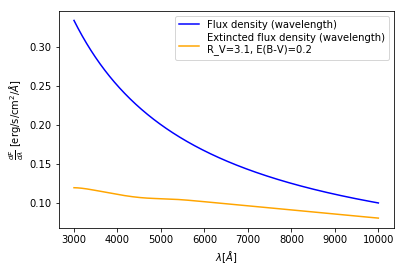

In [7]:
ax1 = plt.gca()

ax1.plot(
    wavelength, flux_density_wavelength, color="blue", label="Flux density (wavelength)"
)
ax1.plot(
    wavelength,
    extincted_flux_density_wavelength,
    color="orange",
    label="Extincted flux density (wavelength)\nR_V=3.1, E(B-V)=0.2",
)
ax1.set_xlabel(r"$\lambda [\AA]$")
ax1.set_ylabel(r"$\frac{dF}{d\lambda}$ [erg/s/cm$^2$/$\AA$]")
ax1.legend();

------

## 2. Translating color excess to $A_V$

$A_V = R_V \times E(B-V)$
are the standard reference bands for extinction calculations.  This is an arbitrary choice.  We can compute the relationship between the excess in other colors and the extinction in a given band.

We will first need some filters to define our bandpasses.  We will use the `stsynphot` package as one convenient way of grabbing some standard filters.

```
pip install stsynphot
```

There's a bit more work to grab the actual data files.  We only need `synphot1.tar.gz`, which has the filters.

ftp://archive.stsci.edu/pub/hst/pysynphot/synphot1.tar.gz

In [8]:
! curl -O ftp://archive.stsci.edu/pub/hst/pysynphot/synphot1.tar.gz
! tar xvzf synphot1.tar.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 90.0M  100 90.0M    0     0  18.5M      0  0:00:04  0:00:04 --:--:-- 18.6M15k      0  0:00:13  0:00:01  0:00:12 6814k
x grp/hst/cdbs/mtab/3241637sm_tmt.fits
x grp/hst/cdbs/mtab/41g1452dm_tmc.fits
x grp/hst/cdbs/mtab/41g16069m_tmg.fits
x grp/hst/cdbs/comp/acs/acs_block1_002_syn.fits
x grp/hst/cdbs/comp/acs/acs_block2_002_syn.fits
x grp/hst/cdbs/comp/acs/acs_block3_002_syn.fits
x grp/hst/cdbs/comp/acs/acs_block4_002_syn.fits
x grp/hst/cdbs/comp/acs/acs_blocking1_001_syn.fits
x grp/hst/cdbs/comp/acs/acs_blocking2_001_syn.fits
x grp/hst/cdbs/comp/acs/acs_blocking3_001_syn.fits
x grp/hst/cdbs/comp/acs/acs_blocking4_001_syn.fits
x grp/hst/cdbs/comp/acs/acs_cor_aper_001_syn.fits
x grp/hst/cdbs/comp/acs/acs_cor_aper_002_syn.fits
x grp/hst/cdbs/comp/acs/acs_f115lp_001.tab
x grp/hst/cdbs/comp/acs/acs_f115lp_002.tab
x grp/hst/cdbs/comp/a

x grp/hst/cdbs/comp/acs/acs_f658n_wfc_008_syn.fits
x grp/hst/cdbs/comp/acs/acs_f660n_001.tab
x grp/hst/cdbs/comp/acs/acs_f660n_002.fits
x grp/hst/cdbs/comp/acs/acs_f660n_003_syn.fits
x grp/hst/cdbs/comp/acs/acs_f660n_004_syn.fits
x grp/hst/cdbs/comp/acs/acs_f660n_005_syn.fits
x grp/hst/cdbs/comp/acs/acs_f660n_006_syn.fits
x grp/hst/cdbs/comp/acs/acs_f660n_hrc_007_syn.fits
x grp/hst/cdbs/comp/acs/acs_f660n_hrc_008_syn.fits
x grp/hst/cdbs/comp/acs/acs_f660n_wfc_007_syn.fits
x grp/hst/cdbs/comp/acs/acs_f660n_wfc_008_syn.fits
x grp/hst/cdbs/comp/acs/acs_f775w_001.tab
x grp/hst/cdbs/comp/acs/acs_f775w_002.fits
x grp/hst/cdbs/comp/acs/acs_f775w_003_syn.fits
x grp/hst/cdbs/comp/acs/acs_f775w_004_syn.fits
x grp/hst/cdbs/comp/acs/acs_f775w_hrc_001.tab
x grp/hst/cdbs/comp/acs/acs_f775w_hrc_002.fits
x grp/hst/cdbs/comp/acs/acs_f775w_hrc_003_syn.fits
x grp/hst/cdbs/comp/acs/acs_f775w_hrc_004_syn.fits
x grp/hst/cdbs/comp/acs/acs_f775w_hrc_005_syn.fits
x grp/hst/cdbs/comp/acs/acs_f775w_hrc_006_syn.f

x grp/hst/cdbs/comp/acs/acs_pol_v_005_syn.fits
x grp/hst/cdbs/comp/acs/acs_pr110l_001.tab
x grp/hst/cdbs/comp/acs/acs_pr110l_002.tab
x grp/hst/cdbs/comp/acs/acs_pr110l_003.fits
x grp/hst/cdbs/comp/acs/acs_pr110l_004_syn.fits
x grp/hst/cdbs/comp/acs/acs_pr110l_005_syn.fits
x grp/hst/cdbs/comp/acs/acs_pr110l_006_syn.fits
x grp/hst/cdbs/comp/acs/acs_pr110l_007_syn.fits
x grp/hst/cdbs/comp/acs/acs_pr110l_sbc_001.tab
x grp/hst/cdbs/comp/acs/acs_pr110l_sbc_002.fits
x grp/hst/cdbs/comp/acs/acs_pr110l_sbc_003_syn.fits
x grp/hst/cdbs/comp/acs/acs_pr110l_sbc_004_syn.fits
x grp/hst/cdbs/comp/acs/acs_pr110l_tds_def_001_syn.fits
x grp/hst/cdbs/comp/acs/acs_pr110l_tds_mjd_001_syn.fits
x grp/hst/cdbs/comp/acs/acs_pr130l_001.tab
x grp/hst/cdbs/comp/acs/acs_pr130l_002.tab
x grp/hst/cdbs/comp/acs/acs_pr130l_003.fits
x grp/hst/cdbs/comp/acs/acs_pr130l_004_syn.fits
x grp/hst/cdbs/comp/acs/acs_pr130l_005_syn.fits
x grp/hst/cdbs/comp/acs/acs_pr130l_006_syn.fits
x grp/hst/cdbs/comp/acs/acs_pr130l_007_syn.fit

x grp/hst/cdbs/comp/cos/cos_mcp_g130mc1222_mjd_005_syn.fits
x grp/hst/cdbs/comp/cos/cos_mcp_g130mc1222_mjd_006_syn.fits
x grp/hst/cdbs/comp/cos/cos_mcp_g130mc1222_mjd_007_syn.fits
x grp/hst/cdbs/comp/cos/cos_mcp_g130mc1222_mjd_008_syn.fits
x grp/hst/cdbs/comp/cos/cos_mcp_g130mc1222_mjd_009_syn.fits
x grp/hst/cdbs/comp/cos/cos_mcp_g130mc1291_001_syn.fits
x grp/hst/cdbs/comp/cos/cos_mcp_g130mc1291_002_syn.fits
x grp/hst/cdbs/comp/cos/cos_mcp_g130mc1291_003_syn.fits
x grp/hst/cdbs/comp/cos/cos_mcp_g130mc1291_004_syn.fits
x grp/hst/cdbs/comp/cos/cos_mcp_g130mc1291_005_syn.fits
x grp/hst/cdbs/comp/cos/cos_mcp_g130mc1291_006_syn.fits
x grp/hst/cdbs/comp/cos/cos_mcp_g130mc1291_008_syn.fits
x grp/hst/cdbs/comp/cos/cos_mcp_g130mc1291_009_syn.fits
x grp/hst/cdbs/comp/cos/cos_mcp_g130mc1291_010_syn.fits
x grp/hst/cdbs/comp/cos/cos_mcp_g130mc1291_011_syn.fits
x grp/hst/cdbs/comp/cos/cos_mcp_g130mc1291_012_syn.fits
x grp/hst/cdbs/comp/cos/cos_mcp_g130mc1291_013_syn.fits
x grp/hst/cdbs/comp/cos/cos_

x grp/hst/cdbs/comp/cos/cos_mcp_g140lc1280_004_syn.fits
x grp/hst/cdbs/comp/cos/cos_mcp_g140lc1280_005_syn.fits
x grp/hst/cdbs/comp/cos/cos_mcp_g140lc1280_006_syn.fits
x grp/hst/cdbs/comp/cos/cos_mcp_g140lc1280_007_syn.fits
x grp/hst/cdbs/comp/cos/cos_mcp_g140lc1280_008_syn.fits
x grp/hst/cdbs/comp/cos/cos_mcp_g140lc1280_009_syn.fits
x grp/hst/cdbs/comp/cos/cos_mcp_g140lc1280_010_syn.fits
x grp/hst/cdbs/comp/cos/cos_mcp_g140lc1280_011_syn.fits
x grp/hst/cdbs/comp/cos/cos_mcp_g140lc1280_mjd_004_syn.fits
x grp/hst/cdbs/comp/cos/cos_mcp_g140lc1280_mjd_005_syn.fits
x grp/hst/cdbs/comp/cos/cos_mcp_g140lc1280_mjd_006_syn.fits
x grp/hst/cdbs/comp/cos/cos_mcp_g140lc1280_mjd_007_syn.fits
x grp/hst/cdbs/comp/cos/cos_mcp_g140lc1280_mjd_008_syn.fits
x grp/hst/cdbs/comp/cos/cos_mcp_g140lc1280_mjd_009_syn.fits
x grp/hst/cdbs/comp/cos/cos_mcp_g140lc1280_mjd_010_syn.fits
x grp/hst/cdbs/comp/cos/cos_mcp_g140lc1280_mjd_011_syn.fits
x grp/hst/cdbs/comp/cos/cos_mcp_g140lc800_001_syn.fits
x grp/hst/cdbs/co

x grp/hst/cdbs/comp/cos/cos_mirrorb_009_syn.fits
x grp/hst/cdbs/comp/cos/cos_mirrorb_mjd_009_syn.fits
x grp/hst/cdbs/comp/cos/cos_ncm1_001_syn.fits
x grp/hst/cdbs/comp/cos/cos_ncm1_002_syn.fits
x grp/hst/cdbs/comp/cos/cos_ncm1_003_syn.fits
x grp/hst/cdbs/comp/cos/cos_ncm1_004_syn.fits
x grp/hst/cdbs/comp/cos/cos_ncm2_001_syn.fits
x grp/hst/cdbs/comp/cos/cos_ncm2_002_syn.fits
x grp/hst/cdbs/comp/cos/cos_ncm2_003_syn.fits
x grp/hst/cdbs/comp/cos/cos_ncm2_004_syn.fits
x grp/hst/cdbs/comp/cos/cosncm3a_g230lc2635_001_syn.fits
x grp/hst/cdbs/comp/cos/cosncm3a_g230lc2950_001_syn.fits
x grp/hst/cdbs/comp/cos/cosncm3a_g230lc3000_001_syn.fits
x grp/hst/cdbs/comp/cos/cosncm3a_g230lc3360_001_syn.fits
x grp/hst/cdbs/comp/cos/cos_ncm3b_002_syn.fits
x grp/hst/cdbs/comp/cos/cos_ncm3b_003_syn.fits
x grp/hst/cdbs/comp/cos/cos_ncm3b_004_syn.fits
x grp/hst/cdbs/comp/cos/cosncm3b_g230lc2635_001_syn.fits
x grp/hst/cdbs/comp/cos/cosncm3b_g230lc2950_001_syn.fits
x grp/hst/cdbs/comp/cos/cosncm3b_g230lc3000_001

x grp/hst/cdbs/comp/cos/cosncm3_g185mc1921_mjd_012_syn.fits
x grp/hst/cdbs/comp/cos/cosncm3_g185mc1941_001_syn.fits
x grp/hst/cdbs/comp/cos/cosncm3_g185mc1941_003_syn.fits
x grp/hst/cdbs/comp/cos/cosncm3_g185mc1941_004_syn.fits
x grp/hst/cdbs/comp/cos/cosncm3_g185mc1941_005_syn.fits
x grp/hst/cdbs/comp/cos/cosncm3_g185mc1941_006_syn.fits
x grp/hst/cdbs/comp/cos/cosncm3_g185mc1941_008_syn.fits
x grp/hst/cdbs/comp/cos/cosncm3_g185mc1941_009_syn.fits
x grp/hst/cdbs/comp/cos/cosncm3_g185mc1941_010_syn.fits
x grp/hst/cdbs/comp/cos/cosncm3_g185mc1941_011_syn.fits
x grp/hst/cdbs/comp/cos/cosncm3_g185mc1941_012_syn.fits
x grp/hst/cdbs/comp/cos/cosncm3_g185mc1941_mjd_008_syn.fits
x grp/hst/cdbs/comp/cos/cosncm3_g185mc1941_mjd_009_syn.fits
x grp/hst/cdbs/comp/cos/cosncm3_g185mc1941_mjd_010_syn.fits
x grp/hst/cdbs/comp/cos/cosncm3_g185mc1941_mjd_011_syn.fits
x grp/hst/cdbs/comp/cos/cosncm3_g185mc1941_mjd_012_syn.fits
x grp/hst/cdbs/comp/cos/cosncm3_g185mc1953_001_syn.fits
x grp/hst/cdbs/comp/cos/

x grp/hst/cdbs/comp/cos/cosncm3_g225mc2306_009_syn.fits
x grp/hst/cdbs/comp/cos/cosncm3_g225mc2306_010_syn.fits
x grp/hst/cdbs/comp/cos/cosncm3_g225mc2306_011_syn.fits
x grp/hst/cdbs/comp/cos/cosncm3_g225mc2306_012_syn.fits
x grp/hst/cdbs/comp/cos/cosncm3_g225mc2306_mjd_008_syn.fits
x grp/hst/cdbs/comp/cos/cosncm3_g225mc2306_mjd_009_syn.fits
x grp/hst/cdbs/comp/cos/cosncm3_g225mc2306_mjd_010_syn.fits
x grp/hst/cdbs/comp/cos/cosncm3_g225mc2306_mjd_011_syn.fits
x grp/hst/cdbs/comp/cos/cosncm3_g225mc2306_mjd_012_syn.fits
x grp/hst/cdbs/comp/cos/cosncm3_g225mc2325_001_syn.fits
x grp/hst/cdbs/comp/cos/cosncm3_g225mc2325_003_syn.fits
x grp/hst/cdbs/comp/cos/cosncm3_g225mc2325_004_syn.fits
x grp/hst/cdbs/comp/cos/cosncm3_g225mc2325_005_syn.fits
x grp/hst/cdbs/comp/cos/cosncm3_g225mc2325_006_syn.fits
x grp/hst/cdbs/comp/cos/cosncm3_g225mc2325_008_syn.fits
x grp/hst/cdbs/comp/cos/cosncm3_g225mc2325_009_syn.fits
x grp/hst/cdbs/comp/cos/cosncm3_g225mc2325_010_syn.fits
x grp/hst/cdbs/comp/cos/cosn

x grp/hst/cdbs/comp/cos/cosncm3_g230lc3360_002_syn.fits
x grp/hst/cdbs/comp/cos/cosncm3_g230lc3360_003_syn.fits
x grp/hst/cdbs/comp/cos/cosncm3_g230lc3360_004_syn.fits
x grp/hst/cdbs/comp/cos/cosncm3_g230lc3360_005_syn.fits
x grp/hst/cdbs/comp/cos/cosncm3_g230lc3360_006_syn.fits
x grp/hst/cdbs/comp/cos/cosncm3_g230lc3360_008_syn.fits
x grp/hst/cdbs/comp/cos/cosncm3_g230lc3360_009_syn.fits
x grp/hst/cdbs/comp/cos/cosncm3_g230lc3360_010_syn.fits
x grp/hst/cdbs/comp/cos/cosncm3_g230lc3360_011_syn.fits
x grp/hst/cdbs/comp/cos/cosncm3_g230lc3360_012_syn.fits
x grp/hst/cdbs/comp/cos/cosncm3_g230lc3360_mjd_008_syn.fits
x grp/hst/cdbs/comp/cos/cosncm3_g230lc3360_mjd_009_syn.fits
x grp/hst/cdbs/comp/cos/cosncm3_g230lc3360_mjd_010_syn.fits
x grp/hst/cdbs/comp/cos/cosncm3_g230lc3360_mjd_011_syn.fits
x grp/hst/cdbs/comp/cos/cosncm3_g230lc3360_mjd_012_syn.fits
x grp/hst/cdbs/comp/cos/cosncm3_g285mc2617_001_syn.fits
x grp/hst/cdbs/comp/cos/cosncm3_g285mc2617_003_syn.fits
x grp/hst/cdbs/comp/cos/cosn

x grp/hst/cdbs/comp/cos/cosncm3_g285mc2952_005_syn.fits
x grp/hst/cdbs/comp/cos/cosncm3_g285mc2952_006_syn.fits
x grp/hst/cdbs/comp/cos/cosncm3_g285mc2952_007_syn.fits
x grp/hst/cdbs/comp/cos/cosncm3_g285mc2952_008_syn.fits
x grp/hst/cdbs/comp/cos/cosncm3_g285mc2952_009_syn.fits
x grp/hst/cdbs/comp/cos/cosncm3_g285mc2952_010_syn.fits
x grp/hst/cdbs/comp/cos/cosncm3_g285mc2952_011_syn.fits
x grp/hst/cdbs/comp/cos/cosncm3_g285mc2952_012_syn.fits
x grp/hst/cdbs/comp/cos/cosncm3_g285mc2952_mjd_008_syn.fits
x grp/hst/cdbs/comp/cos/cosncm3_g285mc2952_mjd_009_syn.fits
x grp/hst/cdbs/comp/cos/cosncm3_g285mc2952_mjd_010_syn.fits
x grp/hst/cdbs/comp/cos/cosncm3_g285mc2952_mjd_011_syn.fits
x grp/hst/cdbs/comp/cos/cosncm3_g285mc2952_mjd_012_syn.fits
x grp/hst/cdbs/comp/cos/cosncm3_g285mc2979_001_syn.fits
x grp/hst/cdbs/comp/cos/cosncm3_g285mc2979_003_syn.fits
x grp/hst/cdbs/comp/cos/cosncm3_g285mc2979_004_syn.fits
x grp/hst/cdbs/comp/cos/cosncm3_g285mc2979_005_syn.fits
x grp/hst/cdbs/comp/cos/cosn

x grp/hst/cdbs/comp/nicmos/nic1_f095n_002.tab
x grp/hst/cdbs/comp/nicmos/nic1_f095n_002_th.fits
x grp/hst/cdbs/comp/nicmos/nic1_f095n_003.tab
x grp/hst/cdbs/comp/nicmos/nic1_f095n_004.tab
x grp/hst/cdbs/comp/nicmos/nic1_f095n_005.fits
x grp/hst/cdbs/comp/nicmos/nic1_f095n_006_syn.fits
x grp/hst/cdbs/comp/nicmos/nic1_f095n_010_syn.fits
x grp/hst/cdbs/comp/nicmos/nic1_f095n_011_syn.fits
x grp/hst/cdbs/comp/nicmos/nic1_f095n_012_syn.fits
x grp/hst/cdbs/comp/nicmos/nic1_f095n_013_syn.fits
x grp/hst/cdbs/comp/nicmos/nic1_f097n_001.tab
x grp/hst/cdbs/comp/nicmos/nic1_f097n_001_th.fits
x grp/hst/cdbs/comp/nicmos/nic1_f097n_002.tab
x grp/hst/cdbs/comp/nicmos/nic1_f097n_002_th.fits
x grp/hst/cdbs/comp/nicmos/nic1_f097n_003.tab
x grp/hst/cdbs/comp/nicmos/nic1_f097n_004.tab
x grp/hst/cdbs/comp/nicmos/nic1_f097n_005.tab
x grp/hst/cdbs/comp/nicmos/nic1_f097n_006.fits
x grp/hst/cdbs/comp/nicmos/nic1_f097n_007_syn.fits
x grp/hst/cdbs/comp/nicmos/nic1_f097n_010_syn.fits
x grp/hst/cdbs/comp/nicmos/nic1

x grp/hst/cdbs/comp/nicmos/nic2_cmask_002.fits
x grp/hst/cdbs/comp/nicmos/nic2_cmask_002_th.fits
x grp/hst/cdbs/comp/nicmos/nic2_cmask_003_syn.fits
x grp/hst/cdbs/comp/nicmos/nic2_dewar_001.tab
x grp/hst/cdbs/comp/nicmos/nic2_dewar_001_th.fits
x grp/hst/cdbs/comp/nicmos/nic2_dewar_002.tab
x grp/hst/cdbs/comp/nicmos/nic2_dewar_002_th.fits
x grp/hst/cdbs/comp/nicmos/nic2_dewar_003.fits
x grp/hst/cdbs/comp/nicmos/nic2_dewar_004_syn.fits
x grp/hst/cdbs/comp/nicmos/nic2_dn_001.tab
x grp/hst/cdbs/comp/nicmos/nic2_dn_002.tab
x grp/hst/cdbs/comp/nicmos/nic2_dn_003.fits
x grp/hst/cdbs/comp/nicmos/nic2_dn_004_syn.fits
x grp/hst/cdbs/comp/nicmos/nic2_dqe_001.tab
x grp/hst/cdbs/comp/nicmos/nic2_dqe_001_th.fits
x grp/hst/cdbs/comp/nicmos/nic2_dqe_002.tab
x grp/hst/cdbs/comp/nicmos/nic2_dqe_002_th.fits
x grp/hst/cdbs/comp/nicmos/nic2_dqe_003.tab
x grp/hst/cdbs/comp/nicmos/nic2_dqe_004.tab
x grp/hst/cdbs/comp/nicmos/nic2_dqe_005.fits
x grp/hst/cdbs/comp/nicmos/nic2_dqe_006_syn.fits
x grp/hst/cdbs/com

x grp/hst/cdbs/comp/nicmos/nic2_pol120l_006_syn.fits
x grp/hst/cdbs/comp/nicmos/nic2_pol120l_007_syn.fits
x grp/hst/cdbs/comp/nicmos/nic2_pol240l_001.tab
x grp/hst/cdbs/comp/nicmos/nic2_pol240l_001_th.fits
x grp/hst/cdbs/comp/nicmos/nic2_pol240l_002.tab
x grp/hst/cdbs/comp/nicmos/nic2_pol240l_002_th.fits
x grp/hst/cdbs/comp/nicmos/nic2_pol240l_003.tab
x grp/hst/cdbs/comp/nicmos/nic2_pol240l_004.fits
x grp/hst/cdbs/comp/nicmos/nic2_pol240l_005_syn.fits
x grp/hst/cdbs/comp/nicmos/nic2_pol240l_006_syn.fits
x grp/hst/cdbs/comp/nicmos/nic2_pol240l_007_syn.fits
x grp/hst/cdbs/comp/nicmos/nic2_primary_001_th.fits
x grp/hst/cdbs/comp/nicmos/nic2_primary_002_th.fits
x grp/hst/cdbs/comp/nicmos/nic2_pupil_001_th.fits
x grp/hst/cdbs/comp/nicmos/nic2_reimag_001_th.fits
x grp/hst/cdbs/comp/nicmos/nic2_secondary_001_th.fits
x grp/hst/cdbs/comp/nicmos/nic2_secondary_002_th.fits
x grp/hst/cdbs/comp/nicmos/nic2_spider_001_th.fits
x grp/hst/cdbs/comp/nicmos/nic2_spider_002_th.fits
x grp/hst/cdbs/comp/nic

x grp/hst/cdbs/comp/nicmos/nic3_image_001.tab
x grp/hst/cdbs/comp/nicmos/nic3_image_002.tab
x grp/hst/cdbs/comp/nicmos/nic3_image_003.fits
x grp/hst/cdbs/comp/nicmos/nic3_image_004_syn.fits
x grp/hst/cdbs/comp/nicmos/nic3_para1_001.tab
x grp/hst/cdbs/comp/nicmos/nic3_para1_002.tab
x grp/hst/cdbs/comp/nicmos/nic3_para1_003.fits
x grp/hst/cdbs/comp/nicmos/nic3_para1_004_syn.fits
x grp/hst/cdbs/comp/nicmos/nic3_para2_001.tab
x grp/hst/cdbs/comp/nicmos/nic3_para2_002.tab
x grp/hst/cdbs/comp/nicmos/nic3_para2_003.fits
x grp/hst/cdbs/comp/nicmos/nic3_para2_004_syn.fits
x grp/hst/cdbs/comp/nicmos/nic_bend1_001.tab
x grp/hst/cdbs/comp/nicmos/nic_bend1_002.tab
x grp/hst/cdbs/comp/nicmos/nic_bend1_003.fits
x grp/hst/cdbs/comp/nicmos/nic_bend1_004_syn.fits
x grp/hst/cdbs/comp/nicmos/nic_primary_001_syn.fits
x grp/hst/cdbs/comp/nicmos/nic_pupil_001.tab
x grp/hst/cdbs/comp/nicmos/nic_pupil_002.tab
x grp/hst/cdbs/comp/nicmos/nic_pupil_003.fits
x grp/hst/cdbs/comp/nicmos/nic_pupil_004_syn.fits
x grp/

x grp/hst/cdbs/comp/stis/stis_1p3_ech_009_003_syn.fits
x grp/hst/cdbs/comp/stis/stis_1p3_ech_010_001.tab
x grp/hst/cdbs/comp/stis/stis_1p3_ech_010_002.fits
x grp/hst/cdbs/comp/stis/stis_1p3_ech_010_003_syn.fits
x grp/hst/cdbs/comp/stis/stis_1p3_ech_011_001.tab
x grp/hst/cdbs/comp/stis/stis_1p3_ech_011_002.fits
x grp/hst/cdbs/comp/stis/stis_1p3_ech_011_003_syn.fits
x grp/hst/cdbs/comp/stis/stis_1p3_ech_012_001.tab
x grp/hst/cdbs/comp/stis/stis_1p3_ech_012_002.fits
x grp/hst/cdbs/comp/stis/stis_1p3_ech_012_003_syn.fits
x grp/hst/cdbs/comp/stis/stis_1p3_ech_013_001.tab
x grp/hst/cdbs/comp/stis/stis_1p3_ech_013_002.fits
x grp/hst/cdbs/comp/stis/stis_1p3_ech_013_003_syn.fits
x grp/hst/cdbs/comp/stis/stis_1p3_ech_014_001.tab
x grp/hst/cdbs/comp/stis/stis_1p3_ech_014_002.fits
x grp/hst/cdbs/comp/stis/stis_1p3_ech_014_003_syn.fits
x grp/hst/cdbs/comp/stis/stis_1p3_ech_015_001.tab
x grp/hst/cdbs/comp/stis/stis_1p3_ech_015_002.fits
x grp/hst/cdbs/comp/stis/stis_1p3_ech_015_003_syn.fits
x grp/hst

x grp/hst/cdbs/comp/stis/stis_1p4_ech_026_002.fits
x grp/hst/cdbs/comp/stis/stis_1p4_ech_026_003_syn.fits
x grp/hst/cdbs/comp/stis/stis_1p4_ech_027_001.tab
x grp/hst/cdbs/comp/stis/stis_1p4_ech_027_002.fits
x grp/hst/cdbs/comp/stis/stis_1p4_ech_027_003_syn.fits
x grp/hst/cdbs/comp/stis/stis_1p4_ech_028_001.tab
x grp/hst/cdbs/comp/stis/stis_1p4_ech_028_002.fits
x grp/hst/cdbs/comp/stis/stis_1p4_ech_028_003_syn.fits
x grp/hst/cdbs/comp/stis/stis_1p4_ech_029_001.tab
x grp/hst/cdbs/comp/stis/stis_1p4_ech_029_002.fits
x grp/hst/cdbs/comp/stis/stis_1p4_ech_029_003_syn.fits
x grp/hst/cdbs/comp/stis/stis_1p4_ech_030_001.tab
x grp/hst/cdbs/comp/stis/stis_1p4_ech_030_002.fits
x grp/hst/cdbs/comp/stis/stis_1p4_ech_030_003_syn.fits
x grp/hst/cdbs/comp/stis/stis_1p4_ech_031_001.tab
x grp/hst/cdbs/comp/stis/stis_1p4_ech_031_002.fits
x grp/hst/cdbs/comp/stis/stis_1p4_ech_031_003_syn.fits
x grp/hst/cdbs/comp/stis/stis_1p4_ech_032_001.tab
x grp/hst/cdbs/comp/stis/stis_1p4_ech_032_002.fits
x grp/hst/cdb

x grp/hst/cdbs/comp/stis/stis_1p4_ech_079_003_syn.fits
x grp/hst/cdbs/comp/stis/stis_1p4_ech_080_001.tab
x grp/hst/cdbs/comp/stis/stis_1p4_ech_080_002.fits
x grp/hst/cdbs/comp/stis/stis_1p4_ech_080_003_syn.fits
x grp/hst/cdbs/comp/stis/stis_1p4_ech_081_001.tab
x grp/hst/cdbs/comp/stis/stis_1p4_ech_081_002.fits
x grp/hst/cdbs/comp/stis/stis_1p4_ech_081_003_syn.fits
x grp/hst/cdbs/comp/stis/stis_1p4_ech_082_001.tab
x grp/hst/cdbs/comp/stis/stis_1p4_ech_082_002.fits
x grp/hst/cdbs/comp/stis/stis_1p4_ech_082_003_syn.fits
x grp/hst/cdbs/comp/stis/stis_1p4_ech_083_001.tab
x grp/hst/cdbs/comp/stis/stis_1p4_ech_083_002.fits
x grp/hst/cdbs/comp/stis/stis_1p4_ech_083_003_syn.fits
x grp/hst/cdbs/comp/stis/stis_1p4_ech_084_001.tab
x grp/hst/cdbs/comp/stis/stis_1p4_ech_084_002.fits
x grp/hst/cdbs/comp/stis/stis_1p4_ech_084_003_syn.fits
x grp/hst/cdbs/comp/stis/stis_1p4_ech_085_001.tab
x grp/hst/cdbs/comp/stis/stis_1p4_ech_085_002.fits
x grp/hst/cdbs/comp/stis/stis_1p4_ech_085_003_syn.fits
x grp/hst

x grp/hst/cdbs/comp/stis/stis_2p2_scan_15_001.tab
x grp/hst/cdbs/comp/stis/stis_2p2_scan_15_002.fits
x grp/hst/cdbs/comp/stis/stis_2p2_scan_15_003_syn.fits
x grp/hst/cdbs/comp/stis/stis_2p2_scan_16_001.tab
x grp/hst/cdbs/comp/stis/stis_2p2_scan_16_002.fits
x grp/hst/cdbs/comp/stis/stis_2p2_scan_16_003_syn.fits
x grp/hst/cdbs/comp/stis/stis_2p2_scan_17_001.tab
x grp/hst/cdbs/comp/stis/stis_2p2_scan_17_002.fits
x grp/hst/cdbs/comp/stis/stis_2p2_scan_17_003_syn.fits
x grp/hst/cdbs/comp/stis/stis_2p2_scan_18_001.tab
x grp/hst/cdbs/comp/stis/stis_2p2_scan_18_002.fits
x grp/hst/cdbs/comp/stis/stis_2p2_scan_18_003_syn.fits
x grp/hst/cdbs/comp/stis/stis_2p2_scan_all_001.tab
x grp/hst/cdbs/comp/stis/stis_2p2_scan_all_002.fits
x grp/hst/cdbs/comp/stis/stis_2p2_scan_all_003_syn.fits
x grp/hst/cdbs/comp/stis/stis_2p3_ech_001_001.tab
x grp/hst/cdbs/comp/stis/stis_2p3_ech_001_002.fits
x grp/hst/cdbs/comp/stis/stis_2p3_ech_001_003_syn.fits
x grp/hst/cdbs/comp/stis/stis_2p3_ech_002_001.tab
x grp/hst/c

x grp/hst/cdbs/comp/stis/stis_2p3_ech_050_001.tab
x grp/hst/cdbs/comp/stis/stis_2p3_ech_050_002.fits
x grp/hst/cdbs/comp/stis/stis_2p3_ech_050_003_syn.fits
x grp/hst/cdbs/comp/stis/stis_2p3_ech_051_001.tab
x grp/hst/cdbs/comp/stis/stis_2p3_ech_051_002.fits
x grp/hst/cdbs/comp/stis/stis_2p3_ech_051_003_syn.fits
x grp/hst/cdbs/comp/stis/stis_2p3_ech_052_001.tab
x grp/hst/cdbs/comp/stis/stis_2p3_ech_052_002.fits
x grp/hst/cdbs/comp/stis/stis_2p3_ech_052_003_syn.fits
x grp/hst/cdbs/comp/stis/stis_2p3_ech_053_001.tab
x grp/hst/cdbs/comp/stis/stis_2p3_ech_053_002.fits
x grp/hst/cdbs/comp/stis/stis_2p3_ech_053_003_syn.fits
x grp/hst/cdbs/comp/stis/stis_2p3_ech_054_001.tab
x grp/hst/cdbs/comp/stis/stis_2p3_ech_054_002.fits
x grp/hst/cdbs/comp/stis/stis_2p3_ech_054_003_syn.fits
x grp/hst/cdbs/comp/stis/stis_2p3_ech_055_001.tab
x grp/hst/cdbs/comp/stis/stis_2p3_ech_055_002.fits
x grp/hst/cdbs/comp/stis/stis_2p3_ech_055_003_syn.fits
x grp/hst/cdbs/comp/stis/stis_2p3_ech_056_001.tab
x grp/hst/cdbs

x grp/hst/cdbs/comp/stis/stis_2p4_ech_041_003_syn.fits
x grp/hst/cdbs/comp/stis/stis_2p4_ech_042_001.tab
x grp/hst/cdbs/comp/stis/stis_2p4_ech_042_002.fits
x grp/hst/cdbs/comp/stis/stis_2p4_ech_042_003_syn.fits
x grp/hst/cdbs/comp/stis/stis_2p4_ech_043_001.tab
x grp/hst/cdbs/comp/stis/stis_2p4_ech_043_002.fits
x grp/hst/cdbs/comp/stis/stis_2p4_ech_043_003_syn.fits
x grp/hst/cdbs/comp/stis/stis_2p4_ech_044_001.tab
x grp/hst/cdbs/comp/stis/stis_2p4_ech_044_002.fits
x grp/hst/cdbs/comp/stis/stis_2p4_ech_044_003_syn.fits
x grp/hst/cdbs/comp/stis/stis_2p4_ech_045_001.tab
x grp/hst/cdbs/comp/stis/stis_2p4_ech_045_002.fits
x grp/hst/cdbs/comp/stis/stis_2p4_ech_045_003_syn.fits
x grp/hst/cdbs/comp/stis/stis_2p4_ech_046_001.tab
x grp/hst/cdbs/comp/stis/stis_2p4_ech_046_002.fits
x grp/hst/cdbs/comp/stis/stis_2p4_ech_046_003_syn.fits
x grp/hst/cdbs/comp/stis/stis_2p4_ech_047_001.tab
x grp/hst/cdbs/comp/stis/stis_2p4_ech_047_002.fits
x grp/hst/cdbs/comp/stis/stis_2p4_ech_047_003_syn.fits
x grp/hst

x grp/hst/cdbs/comp/stis/stis_2p4_ech_095_002.fits
x grp/hst/cdbs/comp/stis/stis_2p4_ech_095_003_syn.fits
x grp/hst/cdbs/comp/stis/stis_2p4_ech_096_001.tab
x grp/hst/cdbs/comp/stis/stis_2p4_ech_096_002.fits
x grp/hst/cdbs/comp/stis/stis_2p4_ech_096_003_syn.fits
x grp/hst/cdbs/comp/stis/stis_2p4_ech_097_001.tab
x grp/hst/cdbs/comp/stis/stis_2p4_ech_097_002.fits
x grp/hst/cdbs/comp/stis/stis_2p4_ech_097_003_syn.fits
x grp/hst/cdbs/comp/stis/stis_2p4_ech_098_001.tab
x grp/hst/cdbs/comp/stis/stis_2p4_ech_098_002.fits
x grp/hst/cdbs/comp/stis/stis_2p4_ech_098_003_syn.fits
x grp/hst/cdbs/comp/stis/stis_2p4_ech_099_001.tab
x grp/hst/cdbs/comp/stis/stis_2p4_ech_099_002.fits
x grp/hst/cdbs/comp/stis/stis_2p4_ech_099_003_syn.fits
x grp/hst/cdbs/comp/stis/stis_2p4_ech_100_001.tab
x grp/hst/cdbs/comp/stis/stis_2p4_ech_100_002.fits
x grp/hst/cdbs/comp/stis/stis_2p4_ech_100_003_syn.fits
x grp/hst/cdbs/comp/stis/stis_2p4_ech_101_001.tab
x grp/hst/cdbs/comp/stis/stis_2p4_ech_101_002.fits
x grp/hst/cdb

x grp/hst/cdbs/comp/stis/stis_2p4_ech_149_001.tab
x grp/hst/cdbs/comp/stis/stis_2p4_ech_149_002.fits
x grp/hst/cdbs/comp/stis/stis_2p4_ech_149_003_syn.fits
x grp/hst/cdbs/comp/stis/stis_2p4_ech_150_001.tab
x grp/hst/cdbs/comp/stis/stis_2p4_ech_150_002.fits
x grp/hst/cdbs/comp/stis/stis_2p4_ech_150_003_syn.fits
x grp/hst/cdbs/comp/stis/stis_2p4_ech_151_001.tab
x grp/hst/cdbs/comp/stis/stis_2p4_ech_151_002.fits
x grp/hst/cdbs/comp/stis/stis_2p4_ech_151_003_syn.fits
x grp/hst/cdbs/comp/stis/stis_2p4_ech_152_001.tab
x grp/hst/cdbs/comp/stis/stis_2p4_ech_152_002.fits
x grp/hst/cdbs/comp/stis/stis_2p4_ech_152_003_syn.fits
x grp/hst/cdbs/comp/stis/stis_2p4_ech_153_001.tab
x grp/hst/cdbs/comp/stis/stis_2p4_ech_153_002.fits
x grp/hst/cdbs/comp/stis/stis_2p4_ech_153_003_syn.fits
x grp/hst/cdbs/comp/stis/stis_2p4_ech_154_001.tab
x grp/hst/cdbs/comp/stis/stis_2p4_ech_154_002.fits
x grp/hst/cdbs/comp/stis/stis_2p4_ech_154_003_syn.fits
x grp/hst/cdbs/comp/stis/stis_2p4_ech_155_001.tab
x grp/hst/cdbs

x grp/hst/cdbs/comp/stis/stis_2p4_ech_202_001.tab
x grp/hst/cdbs/comp/stis/stis_2p4_ech_202_002.fits
x grp/hst/cdbs/comp/stis/stis_2p4_ech_202_003_syn.fits
x grp/hst/cdbs/comp/stis/stis_2p4_ech_203_001.tab
x grp/hst/cdbs/comp/stis/stis_2p4_ech_203_002.fits
x grp/hst/cdbs/comp/stis/stis_2p4_ech_203_003_syn.fits
x grp/hst/cdbs/comp/stis/stis_2p4_ech_204_001.tab
x grp/hst/cdbs/comp/stis/stis_2p4_ech_204_002.fits
x grp/hst/cdbs/comp/stis/stis_2p4_ech_204_003_syn.fits
x grp/hst/cdbs/comp/stis/stis_2p4_ech_205_001.tab
x grp/hst/cdbs/comp/stis/stis_2p4_ech_205_002.fits
x grp/hst/cdbs/comp/stis/stis_2p4_ech_205_003_syn.fits
x grp/hst/cdbs/comp/stis/stis_2p4_ech_206_001.tab
x grp/hst/cdbs/comp/stis/stis_2p4_ech_206_002.fits
x grp/hst/cdbs/comp/stis/stis_2p4_ech_206_003_syn.fits
x grp/hst/cdbs/comp/stis/stis_2p4_ech_207_001.tab
x grp/hst/cdbs/comp/stis/stis_2p4_ech_207_002.fits
x grp/hst/cdbs/comp/stis/stis_2p4_ech_207_003_syn.fits
x grp/hst/cdbs/comp/stis/stis_2p4_ech_208_001.tab
x grp/hst/cdbs

x grp/hst/cdbs/comp/stis/stis_dw3_001.tab
x grp/hst/cdbs/comp/stis/stis_dw3_002.tab
x grp/hst/cdbs/comp/stis/stis_dw3_003.fits
x grp/hst/cdbs/comp/stis/stis_dw3_004_syn.fits
x grp/hst/cdbs/comp/stis/stis_e140h_001.tab
x grp/hst/cdbs/comp/stis/stis_e140h_002.tab
x grp/hst/cdbs/comp/stis/stis_e140h_003.tab
x grp/hst/cdbs/comp/stis/stis_e140h_004.tab
x grp/hst/cdbs/comp/stis/stis_e140h_005.tab
x grp/hst/cdbs/comp/stis/stis_e140h_006.tab
x grp/hst/cdbs/comp/stis/stis_e140h_007.tab
x grp/hst/cdbs/comp/stis/stis_e140h_008.tab
x grp/hst/cdbs/comp/stis/stis_e140h_009.tab
x grp/hst/cdbs/comp/stis/stis_e140h_010.tab
x grp/hst/cdbs/comp/stis/stis_e140h_011.tab
x grp/hst/cdbs/comp/stis/stis_e140h_012.fits
x grp/hst/cdbs/comp/stis/stis_e140h_013_syn.fits
x grp/hst/cdbs/comp/stis/stis_e140h_014_syn.fits
x grp/hst/cdbs/comp/stis/stis_e140h_all_001.tab
x grp/hst/cdbs/comp/stis/stis_e140h_all_002.fits
x grp/hst/cdbs/comp/stis/stis_e140h_all_003_syn.fits
x grp/hst/cdbs/comp/stis/stis_e140hb_001.tab
x gr

x grp/hst/cdbs/comp/stis/stis_f25ciii_007.tab
x grp/hst/cdbs/comp/stis/stis_f25ciii_008.fits
x grp/hst/cdbs/comp/stis/stis_f25ciii_009_syn.fits
x grp/hst/cdbs/comp/stis/stis_f25cn182_001.tab
x grp/hst/cdbs/comp/stis/stis_f25cn182_002.tab
x grp/hst/cdbs/comp/stis/stis_f25cn182_003.tab
x grp/hst/cdbs/comp/stis/stis_f25cn182_004.tab
x grp/hst/cdbs/comp/stis/stis_f25cn182_005.tab
x grp/hst/cdbs/comp/stis/stis_f25cn182_006.tab
x grp/hst/cdbs/comp/stis/stis_f25cn182_007.fits
x grp/hst/cdbs/comp/stis/stis_f25cn182_008_syn.fits
x grp/hst/cdbs/comp/stis/stis_f25cn270_001.tab
x grp/hst/cdbs/comp/stis/stis_f25cn270_002.tab
x grp/hst/cdbs/comp/stis/stis_f25cn270_003.tab
x grp/hst/cdbs/comp/stis/stis_f25cn270_004.tab
x grp/hst/cdbs/comp/stis/stis_f25cn270_005.tab
x grp/hst/cdbs/comp/stis/stis_f25cn270_006.tab
x grp/hst/cdbs/comp/stis/stis_f25cn270_007.tab
x grp/hst/cdbs/comp/stis/stis_f25cn270_008.fits
x grp/hst/cdbs/comp/stis/stis_f25cn270_009_syn.fits
x grp/hst/cdbs/comp/stis/stis_f25lya_001.tab


x grp/hst/cdbs/comp/stis/stis_g230mb_c1854_002.fits
x grp/hst/cdbs/comp/stis/stis_g230mb_c1854_003_syn.fits
x grp/hst/cdbs/comp/stis/stis_g230mb_c1995_001.tab
x grp/hst/cdbs/comp/stis/stis_g230mb_c1995_002.fits
x grp/hst/cdbs/comp/stis/stis_g230mb_c1995_003_syn.fits
x grp/hst/cdbs/comp/stis/stis_g230mb_c2135_001.tab
x grp/hst/cdbs/comp/stis/stis_g230mb_c2135_002.fits
x grp/hst/cdbs/comp/stis/stis_g230mb_c2135_003_syn.fits
x grp/hst/cdbs/comp/stis/stis_g230mb_c2276_001.tab
x grp/hst/cdbs/comp/stis/stis_g230mb_c2276_002.fits
x grp/hst/cdbs/comp/stis/stis_g230mb_c2276_003_syn.fits
x grp/hst/cdbs/comp/stis/stis_g230mb_c2416_001.tab
x grp/hst/cdbs/comp/stis/stis_g230mb_c2416_002.fits
x grp/hst/cdbs/comp/stis/stis_g230mb_c2416_003_syn.fits
x grp/hst/cdbs/comp/stis/stis_g230mb_c2557_001.tab
x grp/hst/cdbs/comp/stis/stis_g230mb_c2557_002.fits
x grp/hst/cdbs/comp/stis/stis_g230mb_c2557_003_syn.fits
x grp/hst/cdbs/comp/stis/stis_g230mb_c2697_001.tab
x grp/hst/cdbs/comp/stis/stis_g230mb_c2697_002

x grp/hst/cdbs/comp/stis/stis_mama1_004_syn.fits
x grp/hst/cdbs/comp/stis/stis_mama1_005_syn.fits
x grp/hst/cdbs/comp/stis/stis_mama2_001.tab
x grp/hst/cdbs/comp/stis/stis_mama2_002.tab
x grp/hst/cdbs/comp/stis/stis_mama2_003.fits
x grp/hst/cdbs/comp/stis/stis_mama2_004_syn.fits
x grp/hst/cdbs/comp/stis/stis_mama2_005_syn.fits
x grp/hst/cdbs/comp/stis/stis_mgii_001.tab
x grp/hst/cdbs/comp/stis/stis_mirfuv_001.tab
x grp/hst/cdbs/comp/stis/stis_mirfuv_002.tab
x grp/hst/cdbs/comp/stis/stis_mirfuv_003.tab
x grp/hst/cdbs/comp/stis/stis_mirfuv_004.fits
x grp/hst/cdbs/comp/stis/stis_mirfuv_005_syn.fits
x grp/hst/cdbs/comp/stis/stis_mirfuv_006_syn.fits
x grp/hst/cdbs/comp/stis/stis_mirfuv_007_syn.fits
x grp/hst/cdbs/comp/stis/stis_mirnir_001.tab
x grp/hst/cdbs/comp/stis/stis_mirnir_002.tab
x grp/hst/cdbs/comp/stis/stis_mirnir_003.fits
x grp/hst/cdbs/comp/stis/stis_mirnir_004_syn.fits
x grp/hst/cdbs/comp/stis/stis_mirnuv_001.tab
x grp/hst/cdbs/comp/stis/stis_mirnuv_002.tab
x grp/hst/cdbs/comp/s

x grp/hst/cdbs/comp/stis/stis_ng22_002.tab
x grp/hst/cdbs/comp/stis/stis_ng22_003.tab
x grp/hst/cdbs/comp/stis/stis_ng22_004.tab
x grp/hst/cdbs/comp/stis/stis_ng22_005.tab
x grp/hst/cdbs/comp/stis/stis_ng22_006.fits
x grp/hst/cdbs/comp/stis/stis_ng22_007_syn.fits
x grp/hst/cdbs/comp/stis/stis_ng22_008_syn.fits
x grp/hst/cdbs/comp/stis/stis_ng22_009_syn.fits
x grp/hst/cdbs/comp/stis/stis_ng22_010_syn.fits
x grp/hst/cdbs/comp/stis/stis_ng22_010_syn.lod
x grp/hst/cdbs/comp/stis/stis_ng22_011_syn.fits
x grp/hst/cdbs/comp/stis/stis_ng22_012_syn.fits
x grp/hst/cdbs/comp/stis/stis_ng22_013_syn.fits
x grp/hst/cdbs/comp/stis/stis_ng22_014_syn.fits
x grp/hst/cdbs/comp/stis/stis_ng22_015_syn.fits
x grp/hst/cdbs/comp/stis/stis_ng22_016_syn.fits
x grp/hst/cdbs/comp/stis/stis_ng22_017_syn.fits
x grp/hst/cdbs/comp/stis/stis_ng22_018_syn.fits
x grp/hst/cdbs/comp/stis/stis_ng22_019_syn.fits
x grp/hst/cdbs/comp/stis/stis_ng22_020_syn.fits
x grp/hst/cdbs/comp/stis/stis_ng22_021_syn.fits
x grp/hst/cdbs/co

x grp/hst/cdbs/comp/stis/stis_nm16_009_syn.fits
x grp/hst/cdbs/comp/stis/stis_nm16_010_syn.fits
x grp/hst/cdbs/comp/stis/stis_nm16_011_syn.fits
x grp/hst/cdbs/comp/stis/stis_nm16_012_syn.fits
x grp/hst/cdbs/comp/stis/stis_nm16_013_syn.fits
x grp/hst/cdbs/comp/stis/stis_nm16_014_syn.fits
x grp/hst/cdbs/comp/stis/stis_nm16_015_syn.fits
x grp/hst/cdbs/comp/stis/stis_nm16_016_syn.fits
x grp/hst/cdbs/comp/stis/stis_nm16_017_syn.fits
x grp/hst/cdbs/comp/stis/stis_nm16_018_syn.fits
x grp/hst/cdbs/comp/stis/stis_nm16_019_syn.fits
x grp/hst/cdbs/comp/stis/stis_nm16_020_syn.fits
x grp/hst/cdbs/comp/stis/stis_nm16_mjd_006_syn.fits
x grp/hst/cdbs/comp/stis/stis_nm16_mjd_007_syn.fits
x grp/hst/cdbs/comp/stis/stis_nm16_mjd_007_syn.lod
x grp/hst/cdbs/comp/stis/stis_nm16_mjd_008_syn.fits
x grp/hst/cdbs/comp/stis/stis_nm16_mjd_009_syn.fits
x grp/hst/cdbs/comp/stis/stis_nm16_mjd_010_syn.fits
x grp/hst/cdbs/comp/stis/stis_nm16_mjd_011_syn.fits
x grp/hst/cdbs/comp/stis/stis_nm16_mjd_012_syn.fits
x grp/hst

x grp/hst/cdbs/comp/foc/foc_48_m1m2_003_syn.fits
x grp/hst/cdbs/comp/foc/foc_48_n256_001.tab
x grp/hst/cdbs/comp/foc/foc_48_n256_002.fits
x grp/hst/cdbs/comp/foc/foc_48_n256_003_syn.fits
x grp/hst/cdbs/comp/foc/foc_48_n256d_001.tab
x grp/hst/cdbs/comp/foc/foc_48_n256d_002.fits
x grp/hst/cdbs/comp/foc/foc_48_n256d_003_syn.fits
x grp/hst/cdbs/comp/foc/foc_48_n512_001.tab
x grp/hst/cdbs/comp/foc/foc_48_n512_002.fits
x grp/hst/cdbs/comp/foc/foc_48_n512_003_syn.fits
x grp/hst/cdbs/comp/foc/foc_48_nlrg_001.tab
x grp/hst/cdbs/comp/foc/foc_48_nlrg_002.fits
x grp/hst/cdbs/comp/foc/foc_48_nlrg_003_syn.fits
x grp/hst/cdbs/comp/foc/foc_48_occ0p23_001.tab
x grp/hst/cdbs/comp/foc/foc_48_occ0p23_002.tab
x grp/hst/cdbs/comp/foc/foc_48_occ0p23_003.fits
x grp/hst/cdbs/comp/foc/foc_48_occ0p23_004_syn.fits
x grp/hst/cdbs/comp/foc/foc_48_prism1_001.tab
x grp/hst/cdbs/comp/foc/foc_48_prism1_002.tab
x grp/hst/cdbs/comp/foc/foc_48_prism1_003.fits
x grp/hst/cdbs/comp/foc/foc_48_prism1_004_syn.fits
x grp/hst/cd

x grp/hst/cdbs/comp/foc/foc_sp_order2_005.fits
x grp/hst/cdbs/comp/foc/foc_sp_order2_006_syn.fits
x grp/hst/cdbs/comp/foc/foc_sp_order3_001.tab
x grp/hst/cdbs/comp/foc/foc_sp_order3_002.tab
x grp/hst/cdbs/comp/foc/foc_sp_order3_003.tab
x grp/hst/cdbs/comp/foc/foc_sp_order3_004.tab
x grp/hst/cdbs/comp/foc/foc_sp_order3_005.fits
x grp/hst/cdbs/comp/foc/foc_sp_order3_006_syn.fits
x grp/hst/cdbs/comp/foc/foc_sp_order4_001.tab
x grp/hst/cdbs/comp/foc/foc_sp_order4_002.tab
x grp/hst/cdbs/comp/foc/foc_sp_order4_003.tab
x grp/hst/cdbs/comp/foc/foc_sp_order4_004.tab
x grp/hst/cdbs/comp/foc/foc_sp_order4_005.fits
x grp/hst/cdbs/comp/foc/foc_sp_order4_006_syn.fits
x grp/hst/cdbs/comp/foc/foc_sp_orderall_001.tab
x grp/hst/cdbs/comp/foc/foc_sp_orderall_002.tab
x grp/hst/cdbs/comp/foc/foc_sp_orderall_003.tab
x grp/hst/cdbs/comp/foc/foc_sp_orderall_004.fits
x grp/hst/cdbs/comp/foc/foc_sp_orderall_005_syn.fits
x grp/hst/cdbs/comp/foc/foc_sp_rflfold_001.tab
x grp/hst/cdbs/comp/foc/foc_sp_rflfold_002.ta

x grp/hst/cdbs/comp/fos/fos_sqr0p25l_co_001.tab
x grp/hst/cdbs/comp/fos/fos_sqr0p25l_co_002.fits
x grp/hst/cdbs/comp/fos/fos_sqr0p25l_co_003_syn.fits
x grp/hst/cdbs/comp/fos/fos_sqr0p25u_001.tab
x grp/hst/cdbs/comp/fos/fos_sqr0p25u_002.tab
x grp/hst/cdbs/comp/fos/fos_sqr0p25u_003.tab
x grp/hst/cdbs/comp/fos/fos_sqr0p25u_004.fits
x grp/hst/cdbs/comp/fos/fos_sqr0p25u_005_syn.fits
x grp/hst/cdbs/comp/fos/fos_sqr0p25u_co_001.tab
x grp/hst/cdbs/comp/fos/fos_sqr0p25u_co_002.fits
x grp/hst/cdbs/comp/fos/fos_sqr0p25u_co_003_syn.fits
x grp/hst/cdbs/comp/fos/fos_sqr0p5l_001.tab
x grp/hst/cdbs/comp/fos/fos_sqr0p5l_002.tab
x grp/hst/cdbs/comp/fos/fos_sqr0p5l_003.tab
x grp/hst/cdbs/comp/fos/fos_sqr0p5l_004.fits
x grp/hst/cdbs/comp/fos/fos_sqr0p5l_005_syn.fits
x grp/hst/cdbs/comp/fos/fos_sqr0p5l_co_001.tab
x grp/hst/cdbs/comp/fos/fos_sqr0p5l_co_002.fits
x grp/hst/cdbs/comp/fos/fos_sqr0p5l_co_003_syn.fits
x grp/hst/cdbs/comp/fos/fos_sqr0p5u_001.tab
x grp/hst/cdbs/comp/fos/fos_sqr0p5u_002.tab
x grp/hs

x grp/hst/cdbs/comp/hrs/hrs_rfla2_003.tab
x grp/hst/cdbs/comp/hrs/hrs_rfla2_004.tab
x grp/hst/cdbs/comp/hrs/hrs_rfla2_005.tab
x grp/hst/cdbs/comp/hrs/hrs_rfla2_006.fits
x grp/hst/cdbs/comp/hrs/hrs_rfla2_007_syn.fits
x grp/hst/cdbs/comp/hrs/hrs_rflcama_001.tab
x grp/hst/cdbs/comp/hrs/hrs_rflcama_002.tab
x grp/hst/cdbs/comp/hrs/hrs_rflcama_003.fits
x grp/hst/cdbs/comp/hrs/hrs_rflcama_004_syn.fits
x grp/hst/cdbs/comp/hrs/hrs_rflcamb_001.tab
x grp/hst/cdbs/comp/hrs/hrs_rflcamb_002.tab
x grp/hst/cdbs/comp/hrs/hrs_rflcamb_003.fits
x grp/hst/cdbs/comp/hrs/hrs_rflcamb_004_syn.fits
x grp/hst/cdbs/comp/hrs/hrs_rflcda_001.tab
x grp/hst/cdbs/comp/hrs/hrs_rflcda_002.tab
x grp/hst/cdbs/comp/hrs/hrs_rflcda_003.fits
x grp/hst/cdbs/comp/hrs/hrs_rflcda_004_syn.fits
x grp/hst/cdbs/comp/hrs/hrs_rflcdb_001.tab
x grp/hst/cdbs/comp/hrs/hrs_rflcdb_002.fits
x grp/hst/cdbs/comp/hrs/hrs_rflcdb_003_syn.fits
x grp/hst/cdbs/comp/hrs/hrs_rflcol_001.tab
x grp/hst/cdbs/comp/hrs/hrs_rflcol_002.tab
x grp/hst/cdbs/comp/h

x grp/hst/cdbs/comp/hsp/hsp_ap_f184v_b_001.tab
x grp/hst/cdbs/comp/hsp/hsp_ap_f184v_b_002.tab
x grp/hst/cdbs/comp/hsp/hsp_ap_f184v_b_003.fits
x grp/hst/cdbs/comp/hsp/hsp_ap_f184v_b_004_syn.fits
x grp/hst/cdbs/comp/hsp/hsp_ap_f184v_c_001.tab
x grp/hst/cdbs/comp/hsp/hsp_ap_f184v_c_002.tab
x grp/hst/cdbs/comp/hsp/hsp_ap_f184v_c_003.fits
x grp/hst/cdbs/comp/hsp/hsp_ap_f184v_c_004_syn.fits
x grp/hst/cdbs/comp/hsp/hsp_ap_f184v_d_001.tab
x grp/hst/cdbs/comp/hsp/hsp_ap_f184v_d_002.tab
x grp/hst/cdbs/comp/hsp/hsp_ap_f184v_d_003.fits
x grp/hst/cdbs/comp/hsp/hsp_ap_f184v_d_004_syn.fits
x grp/hst/cdbs/comp/hsp/hsp_ap_f216p0_001.tab
x grp/hst/cdbs/comp/hsp/hsp_ap_f216p0_002.tab
x grp/hst/cdbs/comp/hsp/hsp_ap_f216p0_003.fits
x grp/hst/cdbs/comp/hsp/hsp_ap_f216p0_004_syn.fits
x grp/hst/cdbs/comp/hsp/hsp_ap_f216p135_001.tab
x grp/hst/cdbs/comp/hsp/hsp_ap_f216p135_002.tab
x grp/hst/cdbs/comp/hsp/hsp_ap_f216p135_003.fits
x grp/hst/cdbs/comp/hsp/hsp_ap_f216p135_004_syn.fits
x grp/hst/cdbs/comp/hsp/hsp_ap

x grp/hst/cdbs/comp/hsp/hsp_ap_f248u2_c_002.tab
x grp/hst/cdbs/comp/hsp/hsp_ap_f248u2_c_003.fits
x grp/hst/cdbs/comp/hsp/hsp_ap_f248u2_c_004_syn.fits
x grp/hst/cdbs/comp/hsp/hsp_ap_f248u2_d_001.tab
x grp/hst/cdbs/comp/hsp/hsp_ap_f248u2_d_002.tab
x grp/hst/cdbs/comp/hsp/hsp_ap_f248u2_d_003.fits
x grp/hst/cdbs/comp/hsp/hsp_ap_f248u2_d_004_syn.fits
x grp/hst/cdbs/comp/hsp/hsp_ap_f262u2_a_001.tab
x grp/hst/cdbs/comp/hsp/hsp_ap_f262u2_a_002.tab
x grp/hst/cdbs/comp/hsp/hsp_ap_f262u2_a_003.fits
x grp/hst/cdbs/comp/hsp/hsp_ap_f262u2_a_004_syn.fits
x grp/hst/cdbs/comp/hsp/hsp_ap_f262u2_b_001.tab
x grp/hst/cdbs/comp/hsp/hsp_ap_f262u2_b_002.tab
x grp/hst/cdbs/comp/hsp/hsp_ap_f262u2_b_003.fits
x grp/hst/cdbs/comp/hsp/hsp_ap_f262u2_b_004_syn.fits
x grp/hst/cdbs/comp/hsp/hsp_ap_f262v_a_001.tab
x grp/hst/cdbs/comp/hsp/hsp_ap_f262v_a_002.tab
x grp/hst/cdbs/comp/hsp/hsp_ap_f262v_a_003.fits
x grp/hst/cdbs/comp/hsp/hsp_ap_f262v_a_004_syn.fits
x grp/hst/cdbs/comp/hsp/hsp_ap_f262v_b_001.tab
x grp/hst/cdbs/

x grp/hst/cdbs/comp/hsp/hsp_ap_f450v_c_002.tab
x grp/hst/cdbs/comp/hsp/hsp_ap_f450v_c_003.fits
x grp/hst/cdbs/comp/hsp/hsp_ap_f450v_c_004_syn.fits
x grp/hst/cdbs/comp/hsp/hsp_ap_f450v_d_001.tab
x grp/hst/cdbs/comp/hsp/hsp_ap_f450v_d_002.tab
x grp/hst/cdbs/comp/hsp/hsp_ap_f450v_d_003.fits
x grp/hst/cdbs/comp/hsp/hsp_ap_f450v_d_004_syn.fits
x grp/hst/cdbs/comp/hsp/hsp_ap_f551v_a_001.tab
x grp/hst/cdbs/comp/hsp/hsp_ap_f551v_a_002.tab
x grp/hst/cdbs/comp/hsp/hsp_ap_f551v_a_003.fits
x grp/hst/cdbs/comp/hsp/hsp_ap_f551v_a_004_syn.fits
x grp/hst/cdbs/comp/hsp/hsp_ap_f551v_b_001.tab
x grp/hst/cdbs/comp/hsp/hsp_ap_f551v_b_002.tab
x grp/hst/cdbs/comp/hsp/hsp_ap_f551v_b_003.fits
x grp/hst/cdbs/comp/hsp/hsp_ap_f551v_b_004_syn.fits
x grp/hst/cdbs/comp/hsp/hsp_ap_f551v_c_001.tab
x grp/hst/cdbs/comp/hsp/hsp_ap_f551v_c_002.tab
x grp/hst/cdbs/comp/hsp/hsp_ap_f551v_c_003.fits
x grp/hst/cdbs/comp/hsp/hsp_ap_f551v_c_004_syn.fits
x grp/hst/cdbs/comp/hsp/hsp_ap_f551v_d_001.tab
x grp/hst/cdbs/comp/hsp/hsp_ap

x grp/hst/cdbs/comp/nonhst/eso_100_002.fits
x grp/hst/cdbs/comp/nonhst/eso_100_003_syn.fits
x grp/hst/cdbs/comp/nonhst/eso_101_001.tab
x grp/hst/cdbs/comp/nonhst/eso_101_002.fits
x grp/hst/cdbs/comp/nonhst/eso_101_003_syn.fits
x grp/hst/cdbs/comp/nonhst/eso_102_001.tab
x grp/hst/cdbs/comp/nonhst/eso_102_002.fits
x grp/hst/cdbs/comp/nonhst/eso_102_003_syn.fits
x grp/hst/cdbs/comp/nonhst/eso_103_001.tab
x grp/hst/cdbs/comp/nonhst/eso_103_002.fits
x grp/hst/cdbs/comp/nonhst/eso_103_003_syn.fits
x grp/hst/cdbs/comp/nonhst/eso_104_001.tab
x grp/hst/cdbs/comp/nonhst/eso_104_002.fits
x grp/hst/cdbs/comp/nonhst/eso_104_003_syn.fits
x grp/hst/cdbs/comp/nonhst/eso_105_001.tab
x grp/hst/cdbs/comp/nonhst/eso_105_002.fits
x grp/hst/cdbs/comp/nonhst/eso_105_003_syn.fits
x grp/hst/cdbs/comp/nonhst/eso_106_001.tab
x grp/hst/cdbs/comp/nonhst/eso_106_002.fits
x grp/hst/cdbs/comp/nonhst/eso_106_003_syn.fits
x grp/hst/cdbs/comp/nonhst/eso_107_001.tab
x grp/hst/cdbs/comp/nonhst/eso_107_002.fits
x grp/hst/c

x grp/hst/cdbs/comp/nonhst/eso_169_003_syn.fits
x grp/hst/cdbs/comp/nonhst/eso_170_001.tab
x grp/hst/cdbs/comp/nonhst/eso_170_002.fits
x grp/hst/cdbs/comp/nonhst/eso_170_003_syn.fits
x grp/hst/cdbs/comp/nonhst/eso_172_001.tab
x grp/hst/cdbs/comp/nonhst/eso_172_002.fits
x grp/hst/cdbs/comp/nonhst/eso_172_003_syn.fits
x grp/hst/cdbs/comp/nonhst/eso_173_001.tab
x grp/hst/cdbs/comp/nonhst/eso_173_002.fits
x grp/hst/cdbs/comp/nonhst/eso_173_003_syn.fits
x grp/hst/cdbs/comp/nonhst/eso_174_001.tab
x grp/hst/cdbs/comp/nonhst/eso_174_002.fits
x grp/hst/cdbs/comp/nonhst/eso_174_003_syn.fits
x grp/hst/cdbs/comp/nonhst/eso_175_001.tab
x grp/hst/cdbs/comp/nonhst/eso_175_002.fits
x grp/hst/cdbs/comp/nonhst/eso_175_003_syn.fits
x grp/hst/cdbs/comp/nonhst/eso_176_001.tab
x grp/hst/cdbs/comp/nonhst/eso_176_002.fits
x grp/hst/cdbs/comp/nonhst/eso_176_003_syn.fits
x grp/hst/cdbs/comp/nonhst/eso_177_001.tab
x grp/hst/cdbs/comp/nonhst/eso_177_002.fits
x grp/hst/cdbs/comp/nonhst/eso_177_003_syn.fits
x grp/h

x grp/hst/cdbs/comp/nonhst/eso_254_002.fits
x grp/hst/cdbs/comp/nonhst/eso_254_003_syn.fits
x grp/hst/cdbs/comp/nonhst/eso_256_001.tab
x grp/hst/cdbs/comp/nonhst/eso_256_002.fits
x grp/hst/cdbs/comp/nonhst/eso_256_003_syn.fits
x grp/hst/cdbs/comp/nonhst/eso_257_001.tab
x grp/hst/cdbs/comp/nonhst/eso_257_002.fits
x grp/hst/cdbs/comp/nonhst/eso_257_003_syn.fits
x grp/hst/cdbs/comp/nonhst/eso_258_001.tab
x grp/hst/cdbs/comp/nonhst/eso_258_002.fits
x grp/hst/cdbs/comp/nonhst/eso_258_003_syn.fits
x grp/hst/cdbs/comp/nonhst/eso_259_001.tab
x grp/hst/cdbs/comp/nonhst/eso_259_002.fits
x grp/hst/cdbs/comp/nonhst/eso_259_003_syn.fits
x grp/hst/cdbs/comp/nonhst/eso_260_001.tab
x grp/hst/cdbs/comp/nonhst/eso_260_002.fits
x grp/hst/cdbs/comp/nonhst/eso_260_003_syn.fits
x grp/hst/cdbs/comp/nonhst/eso_26_001.tab
x grp/hst/cdbs/comp/nonhst/eso_26_002.fits
x grp/hst/cdbs/comp/nonhst/eso_26_003_syn.fits
x grp/hst/cdbs/comp/nonhst/eso_261_001.tab
x grp/hst/cdbs/comp/nonhst/eso_261_002.fits
x grp/hst/cdbs

x grp/hst/cdbs/comp/nonhst/eso_335_001.tab
x grp/hst/cdbs/comp/nonhst/eso_335_002.fits
x grp/hst/cdbs/comp/nonhst/eso_335_003_syn.fits
x grp/hst/cdbs/comp/nonhst/eso_336_001.tab
x grp/hst/cdbs/comp/nonhst/eso_336_002.fits
x grp/hst/cdbs/comp/nonhst/eso_336_003_syn.fits
x grp/hst/cdbs/comp/nonhst/eso_337_001.tab
x grp/hst/cdbs/comp/nonhst/eso_337_002.fits
x grp/hst/cdbs/comp/nonhst/eso_337_003_syn.fits
x grp/hst/cdbs/comp/nonhst/eso_338_001.tab
x grp/hst/cdbs/comp/nonhst/eso_338_002.fits
x grp/hst/cdbs/comp/nonhst/eso_338_003_syn.fits
x grp/hst/cdbs/comp/nonhst/eso_339_001.tab
x grp/hst/cdbs/comp/nonhst/eso_339_002.fits
x grp/hst/cdbs/comp/nonhst/eso_339_003_syn.fits
x grp/hst/cdbs/comp/nonhst/eso_340_001.tab
x grp/hst/cdbs/comp/nonhst/eso_340_002.fits
x grp/hst/cdbs/comp/nonhst/eso_340_003_syn.fits
x grp/hst/cdbs/comp/nonhst/eso_34_001.tab
x grp/hst/cdbs/comp/nonhst/eso_34_002.fits
x grp/hst/cdbs/comp/nonhst/eso_34_003_syn.fits
x grp/hst/cdbs/comp/nonhst/eso_342_001.tab
x grp/hst/cdbs/

x grp/hst/cdbs/comp/nonhst/eso_424_001.tab
x grp/hst/cdbs/comp/nonhst/eso_424_002.fits
x grp/hst/cdbs/comp/nonhst/eso_424_003_syn.fits
x grp/hst/cdbs/comp/nonhst/eso_425_001.tab
x grp/hst/cdbs/comp/nonhst/eso_425_002.fits
x grp/hst/cdbs/comp/nonhst/eso_425_003_syn.fits
x grp/hst/cdbs/comp/nonhst/eso_426_001.tab
x grp/hst/cdbs/comp/nonhst/eso_426_002.fits
x grp/hst/cdbs/comp/nonhst/eso_426_003_syn.fits
x grp/hst/cdbs/comp/nonhst/eso_427_001.tab
x grp/hst/cdbs/comp/nonhst/eso_427_002.fits
x grp/hst/cdbs/comp/nonhst/eso_427_003_syn.fits
x grp/hst/cdbs/comp/nonhst/eso_428_001.tab
x grp/hst/cdbs/comp/nonhst/eso_428_002.fits
x grp/hst/cdbs/comp/nonhst/eso_428_003_syn.fits
x grp/hst/cdbs/comp/nonhst/eso_429_001.tab
x grp/hst/cdbs/comp/nonhst/eso_429_002.fits
x grp/hst/cdbs/comp/nonhst/eso_429_003_syn.fits
x grp/hst/cdbs/comp/nonhst/eso_430_001.tab
x grp/hst/cdbs/comp/nonhst/eso_430_002.fits
x grp/hst/cdbs/comp/nonhst/eso_430_003_syn.fits
x grp/hst/cdbs/comp/nonhst/eso_43_001.tab
x grp/hst/cdb

x grp/hst/cdbs/comp/nonhst/eso_499_001.tab
x grp/hst/cdbs/comp/nonhst/eso_499_002.fits
x grp/hst/cdbs/comp/nonhst/eso_499_003_syn.fits
x grp/hst/cdbs/comp/nonhst/eso_500_001.tab
x grp/hst/cdbs/comp/nonhst/eso_500_002.fits
x grp/hst/cdbs/comp/nonhst/eso_500_003_syn.fits
x grp/hst/cdbs/comp/nonhst/eso_50_001.tab
x grp/hst/cdbs/comp/nonhst/eso_50_002.fits
x grp/hst/cdbs/comp/nonhst/eso_50_003_syn.fits
x grp/hst/cdbs/comp/nonhst/eso_501_001.tab
x grp/hst/cdbs/comp/nonhst/eso_501_002.fits
x grp/hst/cdbs/comp/nonhst/eso_501_003_syn.fits
x grp/hst/cdbs/comp/nonhst/eso_502_001.tab
x grp/hst/cdbs/comp/nonhst/eso_502_002.fits
x grp/hst/cdbs/comp/nonhst/eso_502_003_syn.fits
x grp/hst/cdbs/comp/nonhst/eso_503_001.tab
x grp/hst/cdbs/comp/nonhst/eso_503_002.fits
x grp/hst/cdbs/comp/nonhst/eso_503_003_syn.fits
x grp/hst/cdbs/comp/nonhst/eso_504_001.tab
x grp/hst/cdbs/comp/nonhst/eso_504_002.fits
x grp/hst/cdbs/comp/nonhst/eso_504_003_syn.fits
x grp/hst/cdbs/comp/nonhst/eso_505_001.tab
x grp/hst/cdbs/

x grp/hst/cdbs/comp/nonhst/eso_70_003_syn.fits
x grp/hst/cdbs/comp/nonhst/eso_71_001.tab
x grp/hst/cdbs/comp/nonhst/eso_71_002.fits
x grp/hst/cdbs/comp/nonhst/eso_71_003_syn.fits
x grp/hst/cdbs/comp/nonhst/eso_74_001.tab
x grp/hst/cdbs/comp/nonhst/eso_74_002.fits
x grp/hst/cdbs/comp/nonhst/eso_74_003_syn.fits
x grp/hst/cdbs/comp/nonhst/eso_75_001.tab
x grp/hst/cdbs/comp/nonhst/eso_75_002.fits
x grp/hst/cdbs/comp/nonhst/eso_75_003_syn.fits
x grp/hst/cdbs/comp/nonhst/eso_76_001.tab
x grp/hst/cdbs/comp/nonhst/eso_76_002.fits
x grp/hst/cdbs/comp/nonhst/eso_76_003_syn.fits
x grp/hst/cdbs/comp/nonhst/eso_77_001.tab
x grp/hst/cdbs/comp/nonhst/eso_77_002.fits
x grp/hst/cdbs/comp/nonhst/eso_77_003_syn.fits
x grp/hst/cdbs/comp/nonhst/eso_78_001.tab
x grp/hst/cdbs/comp/nonhst/eso_78_002.fits
x grp/hst/cdbs/comp/nonhst/eso_78_003_syn.fits
x grp/hst/cdbs/comp/nonhst/eso_79_001.tab
x grp/hst/cdbs/comp/nonhst/eso_79_002.fits
x grp/hst/cdbs/comp/nonhst/eso_79_003_syn.fits
x grp/hst/cdbs/comp/nonhst/es

x grp/hst/cdbs/comp/wfc3/wfc3_ir_f139m_004_syn.fits
x grp/hst/cdbs/comp/wfc3/wfc3_ir_f139m_mjd_004_syn.fits
x grp/hst/cdbs/comp/wfc3/wfc3_ir_f140w_001_syn.fits
x grp/hst/cdbs/comp/wfc3/wfc3_ir_f140w_001_th.fits
x grp/hst/cdbs/comp/wfc3/wfc3_ir_f140w_002_syn.fits
x grp/hst/cdbs/comp/wfc3/wfc3_ir_f140w_002_th.fits
x grp/hst/cdbs/comp/wfc3/wfc3_ir_f140w_003_syn.fits
x grp/hst/cdbs/comp/wfc3/wfc3_ir_f140w_003_th.fits
x grp/hst/cdbs/comp/wfc3/wfc3_ir_f140w_004_syn.fits
x grp/hst/cdbs/comp/wfc3/wfc3_ir_f140w_005_syn.fits
x grp/hst/cdbs/comp/wfc3/wfc3_ir_f140w_mjd_005_syn.fits
x grp/hst/cdbs/comp/wfc3/wfc3_ir_f153m_001_syn.fits
x grp/hst/cdbs/comp/wfc3/wfc3_ir_f153m_001_th.fits
x grp/hst/cdbs/comp/wfc3/wfc3_ir_f153m_002_syn.fits
x grp/hst/cdbs/comp/wfc3/wfc3_ir_f153m_002_th.fits
x grp/hst/cdbs/comp/wfc3/wfc3_ir_f153m_003_syn.fits
x grp/hst/cdbs/comp/wfc3/wfc3_ir_f153m_004_syn.fits
x grp/hst/cdbs/comp/wfc3/wfc3_ir_f153m_mjd_004_syn.fits
x grp/hst/cdbs/comp/wfc3/wfc3_ir_f160w_001_syn.fits
x grp

x grp/hst/cdbs/comp/wfc3/wfc3uvis2_f625w_mjd_006_syn.fits
x grp/hst/cdbs/comp/wfc3/wfc3uvis2_f631n_006_syn.fits
x grp/hst/cdbs/comp/wfc3/wfc3uvis2_f631n_mjd_006_syn.fits
x grp/hst/cdbs/comp/wfc3/wfc3uvis2_f645n_006_syn.fits
x grp/hst/cdbs/comp/wfc3/wfc3uvis2_f645n_mjd_006_syn.fits
x grp/hst/cdbs/comp/wfc3/wfc3uvis2_f656n_006_syn.fits
x grp/hst/cdbs/comp/wfc3/wfc3uvis2_f656n_mjd_006_syn.fits
x grp/hst/cdbs/comp/wfc3/wfc3uvis2_f657n_006_syn.fits
x grp/hst/cdbs/comp/wfc3/wfc3uvis2_f657n_mjd_006_syn.fits
x grp/hst/cdbs/comp/wfc3/wfc3uvis2_f658n_006_syn.fits
x grp/hst/cdbs/comp/wfc3/wfc3uvis2_f658n_mjd_006_syn.fits
x grp/hst/cdbs/comp/wfc3/wfc3uvis2_f665n_006_syn.fits
x grp/hst/cdbs/comp/wfc3/wfc3uvis2_f665n_mjd_006_syn.fits
x grp/hst/cdbs/comp/wfc3/wfc3uvis2_f673n_006_syn.fits
x grp/hst/cdbs/comp/wfc3/wfc3uvis2_f673n_mjd_006_syn.fits
x grp/hst/cdbs/comp/wfc3/wfc3uvis2_f680n_006_syn.fits
x grp/hst/cdbs/comp/wfc3/wfc3uvis2_f680n_mjd_006_syn.fits
x grp/hst/cdbs/comp/wfc3/wfc3uvis2_f689m_006_s

x grp/hst/cdbs/comp/wfc3/wfc3_uvis_f487nf1_001_syn.fits
x grp/hst/cdbs/comp/wfc3/wfc3_uvis_f487nf1_002_syn.fits
x grp/hst/cdbs/comp/wfc3/wfc3_uvis_f487nf1_003_syn.fits
x grp/hst/cdbs/comp/wfc3/wfc3_uvis_f487nf2_001_syn.fits
x grp/hst/cdbs/comp/wfc3/wfc3_uvis_f487nf2_002_syn.fits
x grp/hst/cdbs/comp/wfc3/wfc3_uvis_f487nf2_003_syn.fits
x grp/hst/cdbs/comp/wfc3/wfc3_uvis_f487n_mjd_005_syn.fits
x grp/hst/cdbs/comp/wfc3/wfc3_uvis_f502n_001_syn.fits
x grp/hst/cdbs/comp/wfc3/wfc3_uvis_f502n_002_syn.fits
x grp/hst/cdbs/comp/wfc3/wfc3_uvis_f502n_003_syn.fits
x grp/hst/cdbs/comp/wfc3/wfc3_uvis_f502n_004_syn.fits
x grp/hst/cdbs/comp/wfc3/wfc3_uvis_f502n_005_syn.fits
x grp/hst/cdbs/comp/wfc3/wfc3_uvis_f502nf1_001_syn.fits
x grp/hst/cdbs/comp/wfc3/wfc3_uvis_f502nf1_002_syn.fits
x grp/hst/cdbs/comp/wfc3/wfc3_uvis_f502nf1_003_syn.fits
x grp/hst/cdbs/comp/wfc3/wfc3_uvis_f502nf2_001_syn.fits
x grp/hst/cdbs/comp/wfc3/wfc3_uvis_f502nf2_002_syn.fits
x grp/hst/cdbs/comp/wfc3/wfc3_uvis_f502nf2_003_syn.fits


x grp/hst/cdbs/comp/wfc3/wfc3_uvis_fq243n_004_syn.fits
x grp/hst/cdbs/comp/wfc3/wfc3_uvis_fq243n_005_syn.fits
x grp/hst/cdbs/comp/wfc3/wfc3_uvis_fq243nf1_001_syn.fits
x grp/hst/cdbs/comp/wfc3/wfc3_uvis_fq243nf1_002_syn.fits
x grp/hst/cdbs/comp/wfc3/wfc3_uvis_fq243nf1_003_syn.fits
x grp/hst/cdbs/comp/wfc3/wfc3_uvis_fq243nf2_001_syn.fits
x grp/hst/cdbs/comp/wfc3/wfc3_uvis_fq243nf2_002_syn.fits
x grp/hst/cdbs/comp/wfc3/wfc3_uvis_fq243nf2_003_syn.fits
x grp/hst/cdbs/comp/wfc3/wfc3_uvis_fq243n_mjd_005_syn.fits
x grp/hst/cdbs/comp/wfc3/wfc3_uvis_fq378n_001_syn.fits
x grp/hst/cdbs/comp/wfc3/wfc3_uvis_fq378n_002_syn.fits
x grp/hst/cdbs/comp/wfc3/wfc3_uvis_fq378n_003_syn.fits
x grp/hst/cdbs/comp/wfc3/wfc3_uvis_fq378n_004_syn.fits
x grp/hst/cdbs/comp/wfc3/wfc3_uvis_fq378nf1_001_syn.fits
x grp/hst/cdbs/comp/wfc3/wfc3_uvis_fq378nf1_002_syn.fits
x grp/hst/cdbs/comp/wfc3/wfc3_uvis_fq378nf1_003_syn.fits
x grp/hst/cdbs/comp/wfc3/wfc3_uvis_fq378nf2_001_syn.fits
x grp/hst/cdbs/comp/wfc3/wfc3_uvis_fq378n

x grp/hst/cdbs/comp/wfpc/wfpc_dn5_003_syn.fits
x grp/hst/cdbs/comp/wfpc/wfpc_dn6_001.tab
x grp/hst/cdbs/comp/wfpc/wfpc_dn6_002.fits
x grp/hst/cdbs/comp/wfpc/wfpc_dn6_003_syn.fits
x grp/hst/cdbs/comp/wfpc/wfpc_dn7_001.tab
x grp/hst/cdbs/comp/wfpc/wfpc_dn7_002.fits
x grp/hst/cdbs/comp/wfpc/wfpc_dn7_003_syn.fits
x grp/hst/cdbs/comp/wfpc/wfpc_dn8_001.tab
x grp/hst/cdbs/comp/wfpc/wfpc_dn8_002.fits
x grp/hst/cdbs/comp/wfpc/wfpc_dn8_003_syn.fits
x grp/hst/cdbs/comp/wfpc/wfpc_dqep5_001.tab
x grp/hst/cdbs/comp/wfpc/wfpc_dqep5_002.tab
x grp/hst/cdbs/comp/wfpc/wfpc_dqep5_003.tab
x grp/hst/cdbs/comp/wfpc/wfpc_dqep5_004.fits
x grp/hst/cdbs/comp/wfpc/wfpc_dqep5_005_syn.fits
x grp/hst/cdbs/comp/wfpc/wfpc_dqep6_001.tab
x grp/hst/cdbs/comp/wfpc/wfpc_dqep6_002.tab
x grp/hst/cdbs/comp/wfpc/wfpc_dqep6_003.tab
x grp/hst/cdbs/comp/wfpc/wfpc_dqep6_004.fits
x grp/hst/cdbs/comp/wfpc/wfpc_dqep6_005_syn.fits
x grp/hst/cdbs/comp/wfpc/wfpc_dqep7_001.tab
x grp/hst/cdbs/comp/wfpc/wfpc_dqep7_002.tab
x grp/hst/cdbs/co

x grp/hst/cdbs/comp/wfpc2/wfpc2_a2d15wf3_004_syn.fits
x grp/hst/cdbs/comp/wfpc2/wfpc2_a2d15wf3_004_syn.headpar
x grp/hst/cdbs/comp/wfpc2/wfpc2_a2d15wf3_004_syn.txt
x grp/hst/cdbs/comp/wfpc2/wfpc2_a2d15wf4_001.coldef
x grp/hst/cdbs/comp/wfpc2/wfpc2_a2d15wf4_001.headpar
x grp/hst/cdbs/comp/wfpc2/wfpc2_a2d15wf4_001.tab
x grp/hst/cdbs/comp/wfpc2/wfpc2_a2d15wf4_001.txt
x grp/hst/cdbs/comp/wfpc2/wfpc2_a2d15wf4_002.coldef
x grp/hst/cdbs/comp/wfpc2/wfpc2_a2d15wf4_002.headpar
x grp/hst/cdbs/comp/wfpc2/wfpc2_a2d15wf4_002.tab
x grp/hst/cdbs/comp/wfpc2/wfpc2_a2d15wf4_002.txt
x grp/hst/cdbs/comp/wfpc2/wfpc2_a2d15wf4_003.fits
x grp/hst/cdbs/comp/wfpc2/wfpc2_a2d15wf4_004_syn.coldef
x grp/hst/cdbs/comp/wfpc2/wfpc2_a2d15wf4_004_syn.fits
x grp/hst/cdbs/comp/wfpc2/wfpc2_a2d15wf4_004_syn.headpar
x grp/hst/cdbs/comp/wfpc2/wfpc2_a2d15wf4_004_syn.txt
x grp/hst/cdbs/comp/wfpc2/wfpc2_a2d7pc1_001.coldef
x grp/hst/cdbs/comp/wfpc2/wfpc2_a2d7pc1_001.headpar
x grp/hst/cdbs/comp/wfpc2/wfpc2_a2d7pc1_001.tab
x grp/hst

x grp/hst/cdbs/comp/wfpc2/wfpc2_dqewfc2_002.coldef
x grp/hst/cdbs/comp/wfpc2/wfpc2_dqewfc2_002.headpar
x grp/hst/cdbs/comp/wfpc2/wfpc2_dqewfc2_002.tab
x grp/hst/cdbs/comp/wfpc2/wfpc2_dqewfc2_002.txt
x grp/hst/cdbs/comp/wfpc2/wfpc2_dqewfc2_003.coldef
x grp/hst/cdbs/comp/wfpc2/wfpc2_dqewfc2_003.headpar
x grp/hst/cdbs/comp/wfpc2/wfpc2_dqewfc2_003.tab
x grp/hst/cdbs/comp/wfpc2/wfpc2_dqewfc2_003.txt
x grp/hst/cdbs/comp/wfpc2/wfpc2_dqewfc2_004.fits
x grp/hst/cdbs/comp/wfpc2/wfpc2_dqewfc2_005_syn.coldef
x grp/hst/cdbs/comp/wfpc2/wfpc2_dqewfc2_005_syn.fits
x grp/hst/cdbs/comp/wfpc2/wfpc2_dqewfc2_005_syn.headpar
x grp/hst/cdbs/comp/wfpc2/wfpc2_dqewfc2_005_syn.txt
x grp/hst/cdbs/comp/wfpc2/wfpc2_dqewfc3_001.coldef
x grp/hst/cdbs/comp/wfpc2/wfpc2_dqewfc3_001.headpar
x grp/hst/cdbs/comp/wfpc2/wfpc2_dqewfc3_001.tab
x grp/hst/cdbs/comp/wfpc2/wfpc2_dqewfc3_001.txt
x grp/hst/cdbs/comp/wfpc2/wfpc2_dqewfc3_002.coldef
x grp/hst/cdbs/comp/wfpc2/wfpc2_dqewfc3_002.headpar
x grp/hst/cdbs/comp/wfpc2/wfpc2_dqe

x grp/hst/cdbs/comp/wfpc2/wfpc2_f336w_005.txt
x grp/hst/cdbs/comp/wfpc2/wfpc2_f336w_006.fits
x grp/hst/cdbs/comp/wfpc2/wfpc2_f336w_007_syn.coldef
x grp/hst/cdbs/comp/wfpc2/wfpc2_f336w_007_syn.fits
x grp/hst/cdbs/comp/wfpc2/wfpc2_f336w_007_syn.headpar
x grp/hst/cdbs/comp/wfpc2/wfpc2_f336w_007_syn.txt
x grp/hst/cdbs/comp/wfpc2/wfpc2_f343n_001.coldef
x grp/hst/cdbs/comp/wfpc2/wfpc2_f343n_001.headpar
x grp/hst/cdbs/comp/wfpc2/wfpc2_f343n_001.tab
x grp/hst/cdbs/comp/wfpc2/wfpc2_f343n_001.txt
x grp/hst/cdbs/comp/wfpc2/wfpc2_f343n_002.coldef
x grp/hst/cdbs/comp/wfpc2/wfpc2_f343n_002.headpar
x grp/hst/cdbs/comp/wfpc2/wfpc2_f343n_002.tab
x grp/hst/cdbs/comp/wfpc2/wfpc2_f343n_002.txt
x grp/hst/cdbs/comp/wfpc2/wfpc2_f343n_003.coldef
x grp/hst/cdbs/comp/wfpc2/wfpc2_f343n_003.headpar
x grp/hst/cdbs/comp/wfpc2/wfpc2_f343n_003.tab
x grp/hst/cdbs/comp/wfpc2/wfpc2_f343n_003.txt
x grp/hst/cdbs/comp/wfpc2/wfpc2_f343n_004.fits
x grp/hst/cdbs/comp/wfpc2/wfpc2_f343n_005_syn.coldef
x grp/hst/cdbs/comp/wfpc2/

x grp/hst/cdbs/comp/wfpc2/wfpc2_f569w_001.txt
x grp/hst/cdbs/comp/wfpc2/wfpc2_f569w_002.coldef
x grp/hst/cdbs/comp/wfpc2/wfpc2_f569w_002.headpar
x grp/hst/cdbs/comp/wfpc2/wfpc2_f569w_002.tab
x grp/hst/cdbs/comp/wfpc2/wfpc2_f569w_002.txt
x grp/hst/cdbs/comp/wfpc2/wfpc2_f569w_003.coldef
x grp/hst/cdbs/comp/wfpc2/wfpc2_f569w_003.headpar
x grp/hst/cdbs/comp/wfpc2/wfpc2_f569w_003.tab
x grp/hst/cdbs/comp/wfpc2/wfpc2_f569w_003.txt
x grp/hst/cdbs/comp/wfpc2/wfpc2_f569w_004.fits
x grp/hst/cdbs/comp/wfpc2/wfpc2_f569w_005_syn.coldef
x grp/hst/cdbs/comp/wfpc2/wfpc2_f569w_005_syn.fits
x grp/hst/cdbs/comp/wfpc2/wfpc2_f569w_005_syn.headpar
x grp/hst/cdbs/comp/wfpc2/wfpc2_f569w_005_syn.txt
x grp/hst/cdbs/comp/wfpc2/wfpc2_f588n_001.coldef
x grp/hst/cdbs/comp/wfpc2/wfpc2_f588n_001.headpar
x grp/hst/cdbs/comp/wfpc2/wfpc2_f588n_001.tab
x grp/hst/cdbs/comp/wfpc2/wfpc2_f588n_001.txt
x grp/hst/cdbs/comp/wfpc2/wfpc2_f588n_002.coldef
x grp/hst/cdbs/comp/wfpc2/wfpc2_f588n_002.headpar
x grp/hst/cdbs/comp/wfpc2/w

x grp/hst/cdbs/comp/wfpc2/wfpc2_f814w_006_syn.txt
x grp/hst/cdbs/comp/wfpc2/wfpc2_f850lp_001.coldef
x grp/hst/cdbs/comp/wfpc2/wfpc2_f850lp_001.headpar
x grp/hst/cdbs/comp/wfpc2/wfpc2_f850lp_001.tab
x grp/hst/cdbs/comp/wfpc2/wfpc2_f850lp_001.txt
x grp/hst/cdbs/comp/wfpc2/wfpc2_f850lp_002.coldef
x grp/hst/cdbs/comp/wfpc2/wfpc2_f850lp_002.headpar
x grp/hst/cdbs/comp/wfpc2/wfpc2_f850lp_002.tab
x grp/hst/cdbs/comp/wfpc2/wfpc2_f850lp_002.txt
x grp/hst/cdbs/comp/wfpc2/wfpc2_f850lp_003.coldef
x grp/hst/cdbs/comp/wfpc2/wfpc2_f850lp_003.headpar
x grp/hst/cdbs/comp/wfpc2/wfpc2_f850lp_003.tab
x grp/hst/cdbs/comp/wfpc2/wfpc2_f850lp_003.txt
x grp/hst/cdbs/comp/wfpc2/wfpc2_f850lp_004.coldef
x grp/hst/cdbs/comp/wfpc2/wfpc2_f850lp_004.headpar
x grp/hst/cdbs/comp/wfpc2/wfpc2_f850lp_004.tab
x grp/hst/cdbs/comp/wfpc2/wfpc2_f850lp_004.txt
x grp/hst/cdbs/comp/wfpc2/wfpc2_f850lp_005.fits
x grp/hst/cdbs/comp/wfpc2/wfpc2_f850lp_006_syn.coldef
x grp/hst/cdbs/comp/wfpc2/wfpc2_f850lp_006_syn.fits
x grp/hst/cdbs/c

x grp/hst/cdbs/comp/wfpc2/wfpc2_lrf_002.tab
x grp/hst/cdbs/comp/wfpc2/wfpc2_lrf_002.txt
x grp/hst/cdbs/comp/wfpc2/wfpc2_lrf_003.fits
x grp/hst/cdbs/comp/wfpc2/wfpc2_lrf_004_syn.coldef
x grp/hst/cdbs/comp/wfpc2/wfpc2_lrf_004_syn.fits
x grp/hst/cdbs/comp/wfpc2/wfpc2_lrf_004_syn.headpar
x grp/hst/cdbs/comp/wfpc2/wfpc2_lrf_004_syn.txt
x grp/hst/cdbs/comp/wfpc2/wfpc2_lrf_005_syn.fits
x grp/hst/cdbs/comp/wfpc2/wfpc2_optics_001.coldef
x grp/hst/cdbs/comp/wfpc2/wfpc2_optics_001.headpar
x grp/hst/cdbs/comp/wfpc2/wfpc2_optics_001.tab
x grp/hst/cdbs/comp/wfpc2/wfpc2_optics_001.txt
x grp/hst/cdbs/comp/wfpc2/wfpc2_optics_002.coldef
x grp/hst/cdbs/comp/wfpc2/wfpc2_optics_002.headpar
x grp/hst/cdbs/comp/wfpc2/wfpc2_optics_002.tab
x grp/hst/cdbs/comp/wfpc2/wfpc2_optics_002.txt
x grp/hst/cdbs/comp/wfpc2/wfpc2_optics_003.coldef
x grp/hst/cdbs/comp/wfpc2/wfpc2_optics_003.headpar
x grp/hst/cdbs/comp/wfpc2/wfpc2_optics_003.tab
x grp/hst/cdbs/comp/wfpc2/wfpc2_optics_003.txt
x grp/hst/cdbs/comp/wfpc2/wfpc2_o

In [9]:
# Set our environment so the files get picked up correctly
import os
os.environ['PYSYN_CDBS'] = './synphot_data/grp/hst/cdbs'

In [10]:
from synphot.config import conf as syn_conf
from stsynphot.config import conf
conf.rootdir = 'grp/hst/cdbs'

print(conf.rootdir)
print(syn_conf.johnson_v_file)

grp/hst/cdbs
./synphot_data/grp/hst/cdbs/comp/nonhst/johnson_v_004_syn.fits


We expect that we will get the error about Vega because we haven't downloaded that data because we don't need it.

In [14]:
import stsynphot as stsyn

B_bandpass = stsyn.band('johnson,b')
V_bandpass = stsyn.band('johnson,v')
g_bandpass = stsyn.band('sdss,g')
r_bandpass = stsyn.band('sdss,r')

In [16]:
dir(B_bandpass)

['__add__',
 '__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__div__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmul__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__truediv__',
 '__weakref__',
 '_do_plot',
 '_get_arrays',
 '_get_meta',
 '_internal_flux_unit',
 '_internal_wave_unit',
 '_merge_meta',
 '_model',
 '_model_fconv_wav',
 '_model_param_dict',
 '_obsmode',
 '_process_flux_param',
 '_process_generic_param',
 '_process_wave_param',
 '_validate_flux_unit',
 '_validate_other_mul_div',
 '_validate_wavelengths',
 'area',
 'avgwave',
 'barlam',
 'binned_pixelrange',
 'binned_waverange',
 'binset',
 'bounded_by_zero',
 'check_overlap',
 'efficiency',
 'emflx',
 'equivwidth',
 'force_extrapolation',
 'from_file',

In [17]:
help(B_bandpass)

Help on ObservationSpectralElement in module stsynphot.spectrum object:

class ObservationSpectralElement(synphot.spectrum.SpectralElement)
 |  ObservationSpectralElement(modelclass, obsmode=None, **kwargs)
 |  
 |  Class to handle bandpass from observation mode.
 |  
 |  This class has additional methods that are specific
 |  to observation mode and instrument-specific wavelength set.
 |  
 |  .. note::
 |  
 |      For methods that take ``area``, it is *recommended* but
 |      not required to use `area`.
 |  
 |  Parameters
 |  ----------
 |  modelclass, kwargs
 |      See `~synphot.spectrum.BaseSpectrum`.
 |  
 |  obsmode : `~stsynphot.observationmode.ObservationMode`
 |      Observation mode for this bandpass.
 |  
 |  Method resolution order:
 |      ObservationSpectralElement
 |      synphot.spectrum.SpectralElement
 |      synphot.spectrum.BaseUnitlessSpectrum
 |      synphot.spectrum.BaseSpectrum
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, mo

In [19]:
help(B_bandpass)

Help on ObservationSpectralElement in module stsynphot.spectrum object:

class ObservationSpectralElement(synphot.spectrum.SpectralElement)
 |  ObservationSpectralElement(modelclass, obsmode=None, **kwargs)
 |  
 |  Class to handle bandpass from observation mode.
 |  
 |  This class has additional methods that are specific
 |  to observation mode and instrument-specific wavelength set.
 |  
 |  .. note::
 |  
 |      For methods that take ``area``, it is *recommended* but
 |      not required to use `area`.
 |  
 |  Parameters
 |  ----------
 |  modelclass, kwargs
 |      See `~synphot.spectrum.BaseSpectrum`.
 |  
 |  obsmode : `~stsynphot.observationmode.ObservationMode`
 |      Observation mode for this bandpass.
 |  
 |  Method resolution order:
 |      ObservationSpectralElement
 |      synphot.spectrum.SpectralElement
 |      synphot.spectrum.BaseUnitlessSpectrum
 |      synphot.spectrum.BaseSpectrum
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, mo

In [26]:
B_bandpass.efficiency(wavelengths=wavelength)

<Quantity 0.2094194>

In [23]:
wavelength

<Quantity [ 3000.,  3010.,  3020.,  3030.,  3040.,  3050.,  3060.,  3070.,
            3080.,  3090.,  3100.,  3110.,  3120.,  3130.,  3140.,  3150.,
            3160.,  3170.,  3180.,  3190.,  3200.,  3210.,  3220.,  3230.,
            3240.,  3250.,  3260.,  3270.,  3280.,  3290.,  3300.,  3310.,
            3320.,  3330.,  3340.,  3350.,  3360.,  3370.,  3380.,  3390.,
            3400.,  3410.,  3420.,  3430.,  3440.,  3450.,  3460.,  3470.,
            3480.,  3490.,  3500.,  3510.,  3520.,  3530.,  3540.,  3550.,
            3560.,  3570.,  3580.,  3590.,  3600.,  3610.,  3620.,  3630.,
            3640.,  3650.,  3660.,  3670.,  3680.,  3690.,  3700.,  3710.,
            3720.,  3730.,  3740.,  3750.,  3760.,  3770.,  3780.,  3790.,
            3800.,  3810.,  3820.,  3830.,  3840.,  3850.,  3860.,  3870.,
            3880.,  3890.,  3900.,  3910.,  3920.,  3930.,  3940.,  3950.,
            3960.,  3970.,  3980.,  3990.,  4000.,  4010.,  4020.,  4030.,
            4040.,  4050.

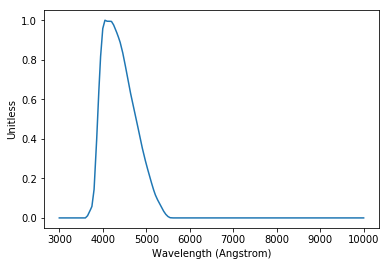

In [25]:
B_bandpass.plot(wavelength)

In [29]:
B_bandpass.efficiency([1000, 2000, 5000])

<Quantity 0.0816>